In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

In [3]:
a=pd.read_csv("data.csv",encoding="latin")

In [4]:
a

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [5]:
a.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
a.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [8]:
a.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
a.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [10]:
a.describe(include="object")

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


In [11]:
a.describe(include="object").T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


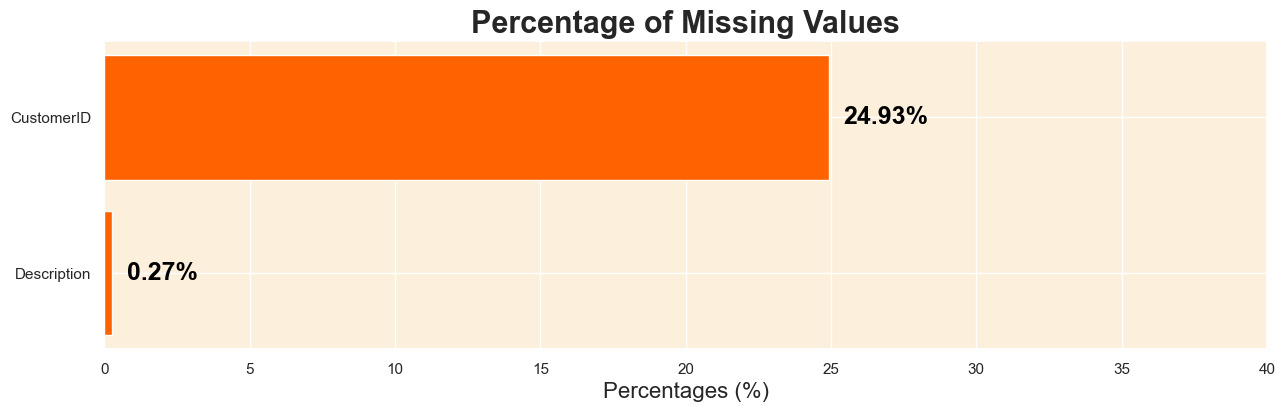

In [12]:
# Calculating the percentage of missing values for each column
missing_data = a.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / a.shape[0]) * 100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

In [13]:
missing_data

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [14]:
missing_percentage = (missing_data[missing_data > 0] / a.shape[0]) * 100

In [15]:
missing_percentage

Description     0.268311
CustomerID     24.926694
dtype: float64

In [16]:
missing_percentage.sort_values(ascending=True, inplace=True)

In [17]:
missing_percentage

Description     0.268311
CustomerID     24.926694
dtype: float64

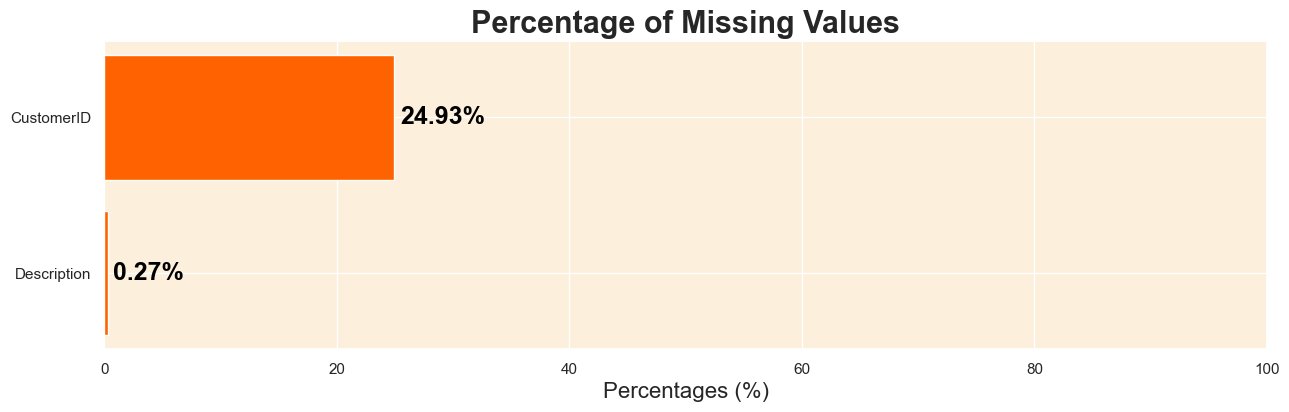

In [18]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')
for i, (r,t) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(r+0.5, i,f"{r:.2f}%", ha='left',va='center', fontweight='bold', fontsize=18, color='black')
ax.set_xlim([0, 100])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()
    

In [19]:
a.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [20]:
missing_values=a.isna().sum()

In [21]:
missing_values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [22]:
missing_values_percenate=(missing_values[missing_values>0]/a.shape[0])*100


In [23]:
missing_values_percenate

Description     0.268311
CustomerID     24.926694
dtype: float64

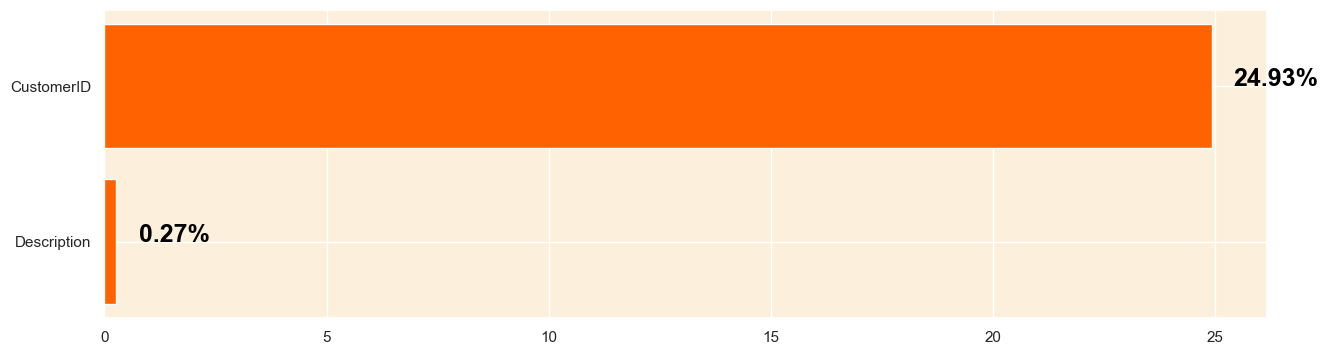

In [24]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')
for i, (r,t) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(r+0.5,i,f"{r:.2f}%",fontweight='bold', fontsize=18, color='black')


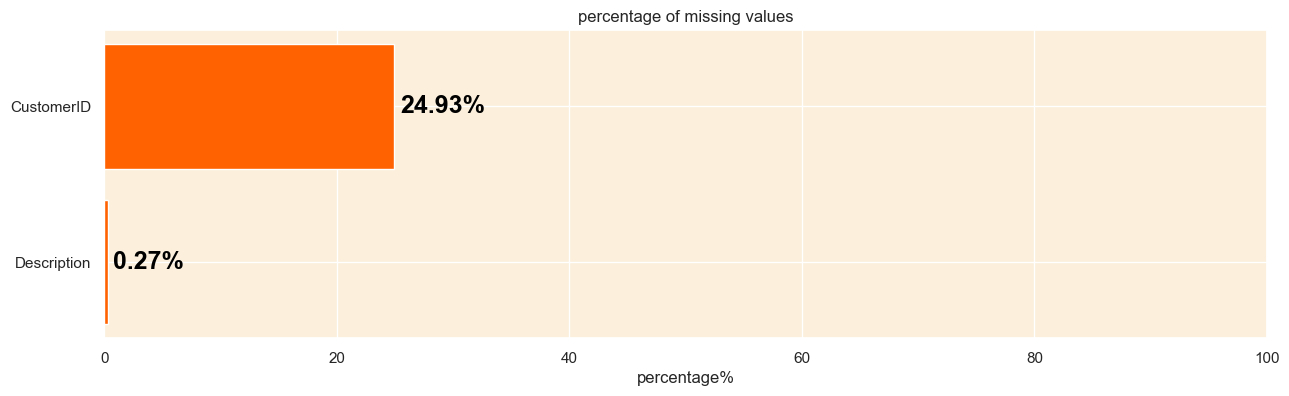

In [25]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')
for i, (r,t) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(r+0.5, i,f"{r:.2f}%", ha='left',va='center', fontweight='bold', fontsize=18, color='black')
plt.xlim([0,100])
plt.title("percentage of missing values")
plt.xlabel("percentage%")
plt.show()


In [26]:
a.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [27]:
p=a["Description"].isna()|a["InvoiceNo"].isna()
a.loc[p]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


In [28]:
a.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [29]:
a=a.dropna(subset=["Description","CustomerID"])

In [30]:
a

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [31]:
a.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [32]:
duplicates=a.duplicated()

In [33]:
a[duplicates]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [34]:
duplicate_rows = a[a.duplicated(keep=False)]

In [35]:
duplicate_rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [36]:
d=duplicate_rows.sort_values(["InvoiceNo","StockCode","Description","Quantity","InvoiceDate","CustomerID"])

In [37]:
d

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
440149,C574510,22360,GLASS JAR ENGLISH CONFECTIONERY,-1,11/4/2011 13:25,2.95,15110.0,United Kingdom
461407,C575940,23309,SET OF 60 I LOVE LONDON CAKE CASES,-24,11/13/2011 11:38,0.55,17838.0,United Kingdom
461408,C575940,23309,SET OF 60 I LOVE LONDON CAKE CASES,-24,11/13/2011 11:38,0.55,17838.0,United Kingdom
529980,C580764,22667,RECIPE BOX RETROSPOT,-12,12/6/2011 10:38,2.95,14562.0,United Kingdom


In [38]:
d.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom


In [39]:
print("the sum of duplicated numbers is",a.duplicated().sum())

the sum of duplicated numbers is 5225


In [40]:
a.drop_duplicates(inplace=True,ignore_index=True)

In [41]:
a

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [42]:
a.duplicated().sum()

0

In [43]:
len(a)

401604

In [44]:
a.shape[0]

401604

In [45]:
a.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [46]:
a["transaction_status"]=np.where(a["InvoiceNo"].astype(str).str.startswith("C"),"Cancelled","Completed")


In [47]:
a

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,Completed
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,Completed
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,Completed
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,Completed


In [48]:
a['InvoiceNo'].astype(str).str.startswith('C')

0         False
1         False
2         False
3         False
4         False
          ...  
401599    False
401600    False
401601    False
401602    False
401603    False
Name: InvoiceNo, Length: 401604, dtype: bool

In [49]:
a[a['InvoiceNo'].str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,Cancelled
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,Cancelled
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,Cancelled
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,Cancelled
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,Cancelled
...,...,...,...,...,...,...,...,...,...
401159,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom,Cancelled
401243,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom,Cancelled
401410,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom,Cancelled
401411,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom,Cancelled


In [50]:
cancelled_transaction=a[a["transaction_status"]=="Cancelled"]

In [51]:
cancelled_transaction

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,Cancelled
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,Cancelled
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,Cancelled
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,Cancelled
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,Cancelled
...,...,...,...,...,...,...,...,...,...
401159,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom,Cancelled
401243,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom,Cancelled
401410,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom,Cancelled
401411,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom,Cancelled


In [52]:
cancelled_transactions = a[a['transaction_status'] == 'Cancelled']

In [53]:
cancelled_transactions

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,Cancelled
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,Cancelled
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,Cancelled
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,Cancelled
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,Cancelled
...,...,...,...,...,...,...,...,...,...
401159,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom,Cancelled
401243,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom,Cancelled
401410,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom,Cancelled
401411,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom,Cancelled


In [54]:
cancelled_transactions.describe().drop('CustomerID', axis=1)

,Quantity,UnitPrice
count,8872.000000,8872.000000
mean,-30.774910,18.899512
std,1172.249902,445.190864
min,-80995.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,4.950000
max,-1.000000,38970.000000


In [55]:
a["transaction_status"].value_counts()

transaction_status
Completed    392732
Cancelled      8872
Name: count, dtype: int64

In [56]:
a['Transaction_Status'] = np.where(a['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

In [57]:
a

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed,Completed
...,...,...,...,...,...,...,...,...,...,...
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,Completed,Completed
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,Completed,Completed
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,Completed,Completed
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,Completed,Completed


In [58]:
a["Transaction_Status"].value_counts()

Transaction_Status
Completed    392732
Cancelled      8872
Name: count, dtype: int64

In [59]:
a.drop(["Transaction_Status"],axis=1,inplace=True)

In [60]:
a

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,Completed
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,Completed
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,Completed
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,Completed


In [61]:
cancelled_transactions=a[a["transaction_status"]=="Cancelled"]

In [62]:
cancelled_transactions

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,Cancelled
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,Cancelled
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,Cancelled
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,Cancelled
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,Cancelled
...,...,...,...,...,...,...,...,...,...
401159,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom,Cancelled
401243,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom,Cancelled
401410,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom,Cancelled
401411,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom,Cancelled


In [63]:
cancelled_transactions.describe()

,Quantity,UnitPrice,CustomerID
count,8872.000000,8872.000000,8872.000000
mean,-30.774910,18.899512,14990.152953
std,1172.249902,445.190864,1708.230387
min,-80995.000000,0.010000,12346.000000
25%,-6.000000,1.450000,13505.000000
50%,-2.000000,2.950000,14868.000000
75%,-1.000000,4.950000,16393.000000
max,-1.000000,38970.000000,18282.000000


In [64]:
cancelled_transactions.describe().drop(["CustomerID"],axis=1)

,Quantity,UnitPrice
count,8872.000000,8872.000000
mean,-30.774910,18.899512
std,1172.249902,445.190864
min,-80995.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,4.950000
max,-1.000000,38970.000000


In [65]:
cancelled_percentage=(cancelled_transactions.shape[0]/a.shape[0])*100

In [66]:
cancelled_percentage

2.209141343213713

In [67]:
print(f"the percentage of cancelled orders:{cancelled_percentage:.2f}%")

the percentage of cancelled orders:2.21%


In [68]:
a.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed


In [69]:
count_stockcodecodes=a["StockCode"].nunique()

In [70]:
count_stockcodecodes

3684

In [71]:
print(f"the count of unique stockcodes:{count_stockcodecodes}")

the count of unique stockcodes:3684


In [72]:
top10stockcodes=a["StockCode"].value_counts().head(10)

In [73]:
top10stockcodes

StockCode
85123A    2065
22423     1894
85099B    1659
47566     1409
84879     1405
20725     1346
22720     1224
POST      1196
22197     1110
23203     1108
Name: count, dtype: int64

In [74]:
f=top10stockcodes.reset_index()

In [75]:
f

,StockCode,count
0,85123A,2065
1,22423,1894
2,85099B,1659
3,47566,1409
4,84879,1405
5,20725,1346
6,22720,1224
7,POST,1196
8,22197,1110
9,23203,1108


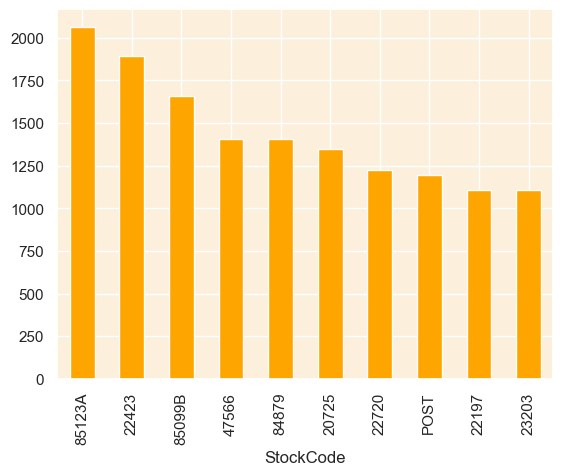

In [76]:
top10stockcodes.plot.bar(color="orange")
plt.show()

In [77]:
a.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed


In [78]:
def fig_size(figure,width,style):
    plt.figure(figsize=(figure,width))
    sns.set_style(style)
def plotting(plot,title,xlabel,ylabel):
    plot.set_title(title,fontsize=12,weight="bold")
    plot.set_xlabel(xlabel,fontsize=12,weight="bold")
    plot.set_ylabel(ylabel,fontsize=12,weight="bold")

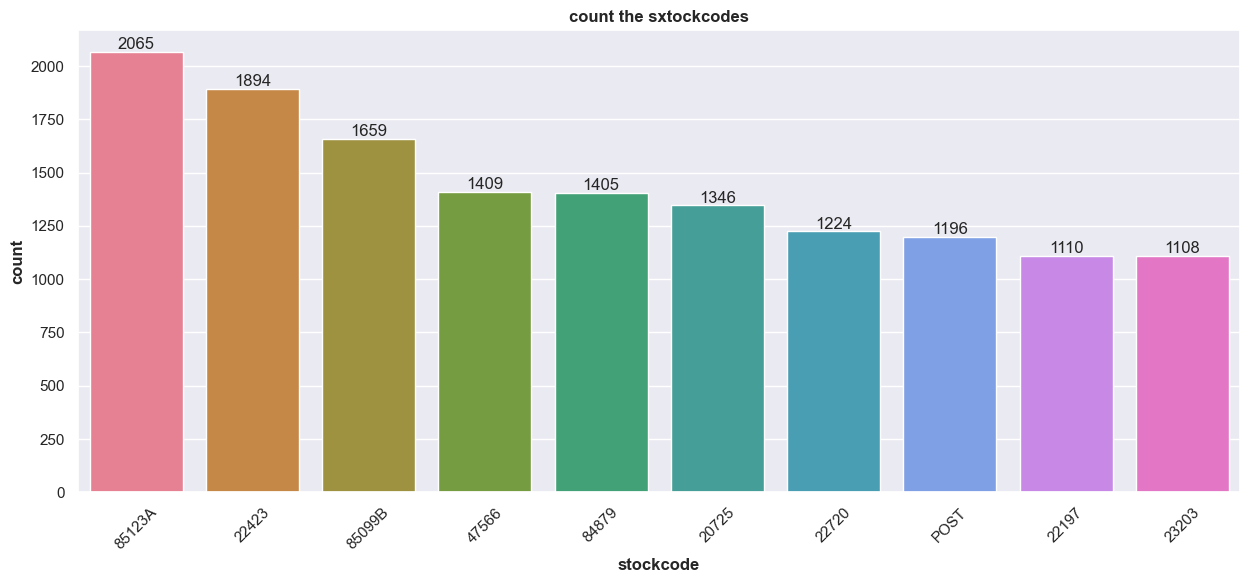

In [79]:
fig_size(15,6,"darkgrid")
ax=sns.countplot(x="StockCode",data=a,order=a["StockCode"].value_counts().iloc[:10].index,palette="husl")
plotting(ax,"count the sxtockcodes","stockcode","count")
for i in ax.containers:
    ax.bar_label(i)
ax.tick_params(axis="x",rotation=45)
plt.show()

In [80]:
top_codes=a["StockCode"].value_counts().head(10)*100

In [81]:
top_codes

StockCode
85123A    206500
22423     189400
85099B    165900
47566     140900
84879     140500
20725     134600
22720     122400
POST      119600
22197     111000
23203     110800
Name: count, dtype: int64

<Axes: ylabel='StockCode'>

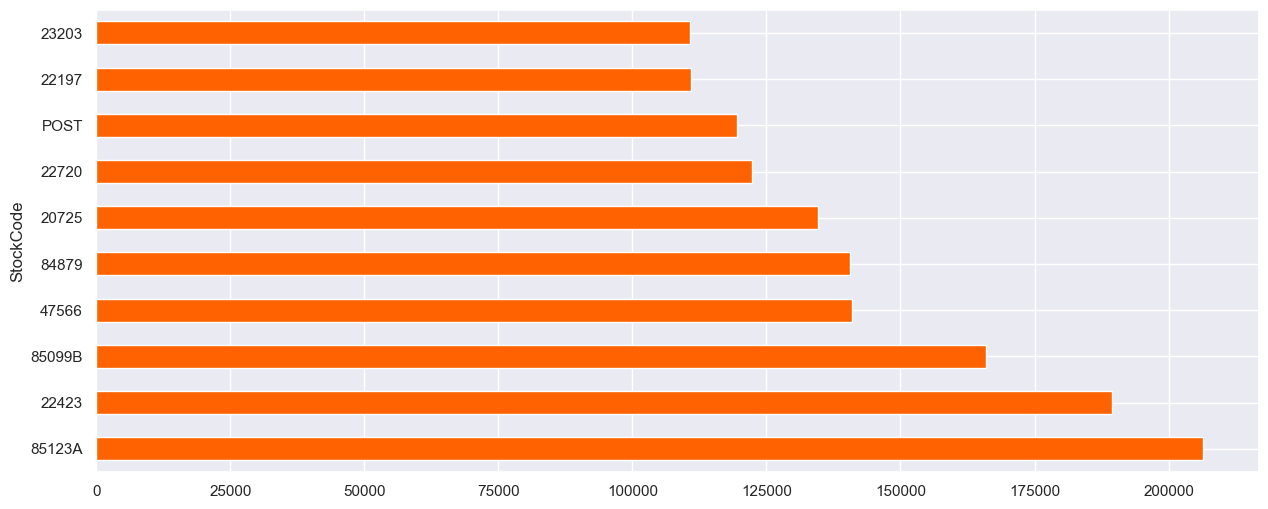

In [82]:
plt.figure(figsize=(15,6))
top_codes.plot(kind="barh",color="#ff6200")

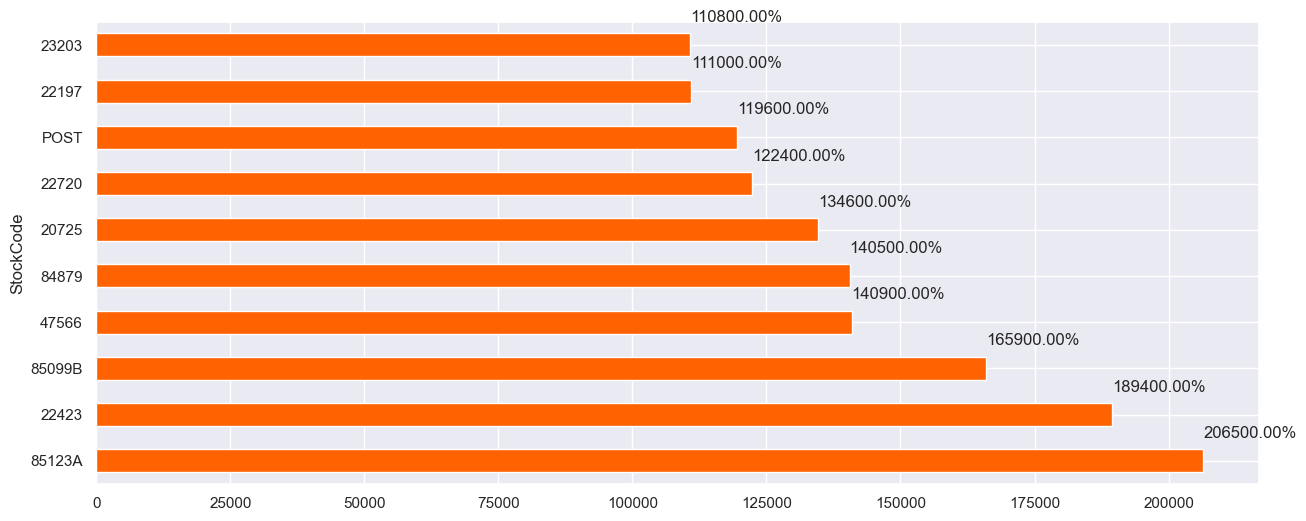

In [83]:
plt.figure(figsize=(15,6))
top_codes.plot(kind="barh",color="#ff6200")
for index,values in enumerate(top_codes):
    plt.text(values,index+0.5,f"{values:.2f}%",fontsize=12)


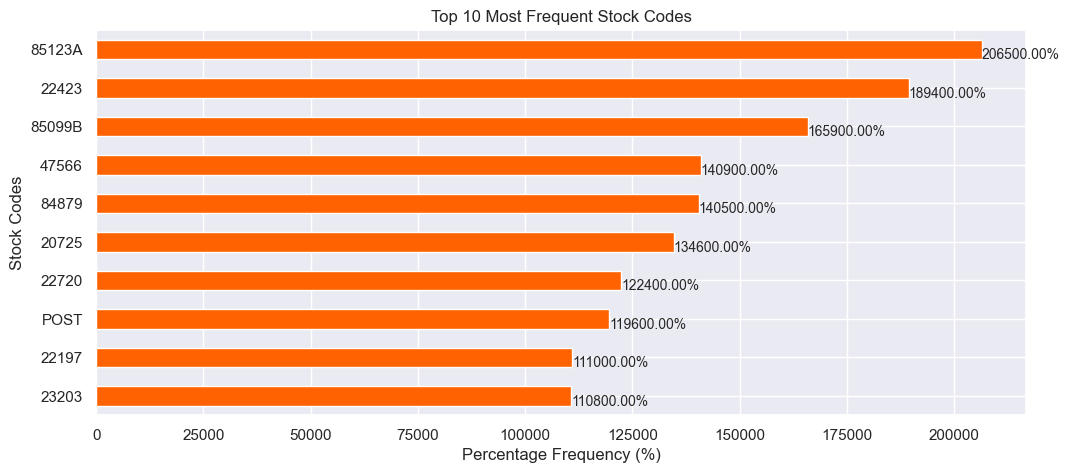

In [84]:
plt.figure(figsize=(12, 5))
top_codes.plot(kind='barh', color='#ff6200')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_codes):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)
plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')
plt.gca().invert_yaxis()
plt.show()

In [85]:
top_10_stock_codes = a['StockCode'].value_counts(normalize=True).head(10) * 100


In [86]:
top_10_stock_codes

StockCode
85123A    0.514188
22423     0.471609
85099B    0.413093
47566     0.350843
84879     0.349847
20725     0.335156
22720     0.304778
POST      0.297806
22197     0.276392
23203     0.275894
Name: proportion, dtype: float64

In [87]:
a.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed


In [88]:
topcodes_normalize=a["StockCode"].value_counts(normalize=True).head(10)*100

In [89]:
topcodes_normalize

StockCode
85123A    0.514188
22423     0.471609
85099B    0.413093
47566     0.350843
84879     0.349847
20725     0.335156
22720     0.304778
POST      0.297806
22197     0.276392
23203     0.275894
Name: proportion, dtype: float64

<Axes: ylabel='StockCode'>

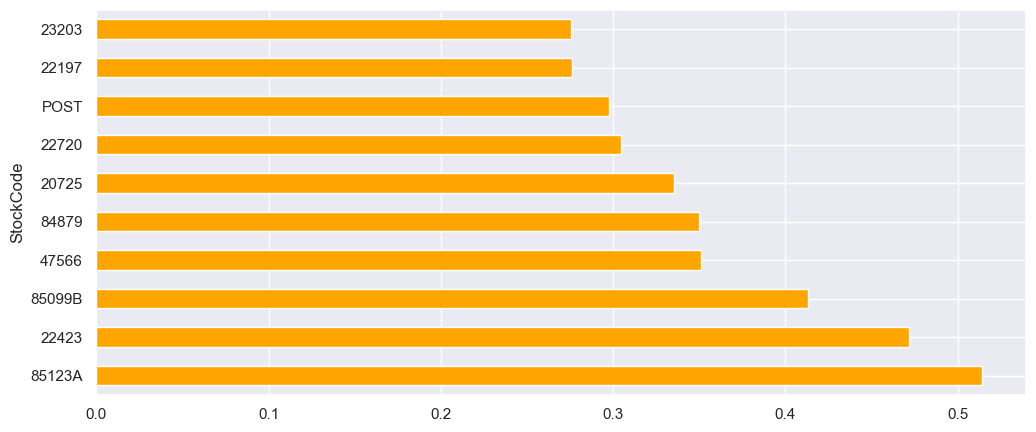

In [90]:
plt.figure(figsize=(12,5))
topcodes_normalize.plot(kind="barh",color="orange")

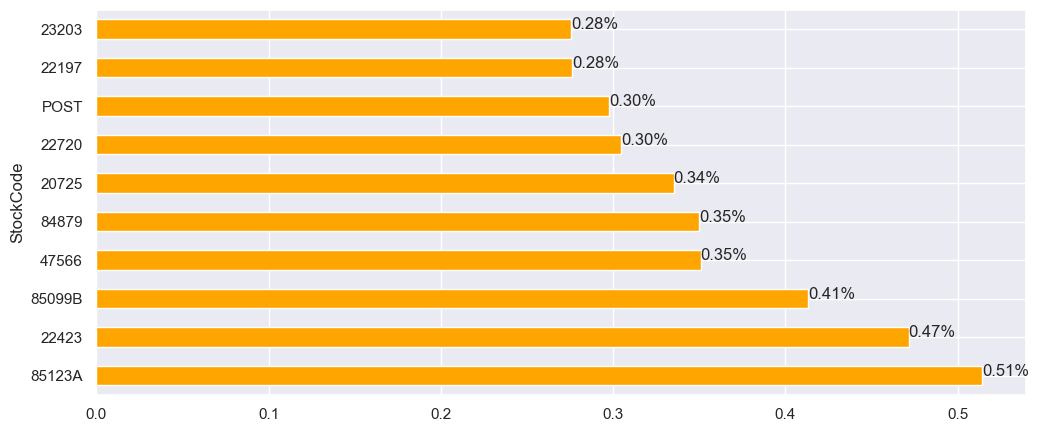

In [91]:
plt.figure(figsize=(12,5))
topcodes_normalize.plot(kind="barh",color="orange")
for i,k in enumerate(topcodes_normalize):
    plt.text(k,i,f"{k:.2f}%",fontsize=12)


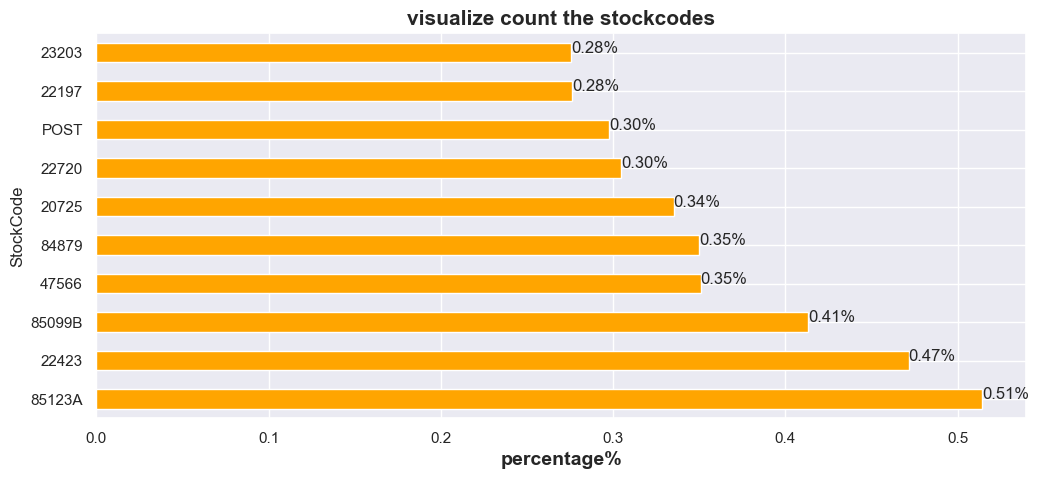

In [92]:
plt.figure(figsize=(12,5))
topcodes_normalize.plot(kind="barh",color="orange")
for i,k in enumerate(topcodes_normalize):
    plt.text(k,i,f"{k:.2f}%",fontsize=12)
plt.xlabel("percentage%",fontsize=14,weight="bold")
plt.title("visualize count the stockcodes",fontsize=15,weight="bold")
plt.show()

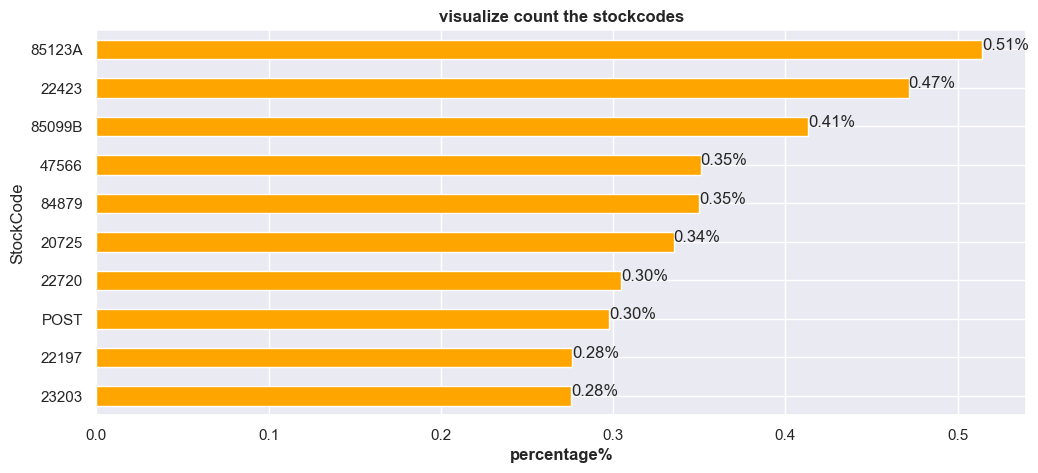

In [93]:
plt.figure(figsize=(12,5))
topcodes_normalize.plot(kind="barh",color="orange")
for i,k in enumerate(topcodes_normalize):
    plt.text(k,i,f"{k:.2f}%",fontsize=12)
plt.xlabel("percentage%",fontsize=12,weight="bold")
plt.title("visualize count the stockcodes",fontsize=12,weight="bold")
plt.gca().invert_yaxis()
plt.show()

In [94]:
a.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed


In [95]:
unique=a["StockCode"].unique()

In [96]:
len(unique)

3684

In [97]:
unique_stock_codes = a['StockCode'].unique()
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

# Printing the value counts for unique stock codes
print("Value counts of numeric character frequencies in unique stock codes:")
print("-"*70)
print(numeric_char_counts_in_unique_codes)

Value counts of numeric character frequencies in unique stock codes:
----------------------------------------------------------------------
5    3676
0       7
1       1
Name: count, dtype: int64


In [98]:
count=pd.Series(unique).apply(lambda x:sum(i.isdigit()   for i in str(x))).value_counts()

In [99]:
count

5    3676
0       7
1       1
Name: count, dtype: int64

In [100]:
anomalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 1)]

# Printing each stock code on a new line
print("Anomalous stock codes:")
print("-"*22)
for code in anomalous_stock_codes:
    print(code)

Anomalous stock codes:
----------------------
POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


In [101]:
j=[i  for i in unique if sum(c.isdigit() for c in str(i)) in (0,1)]


In [102]:
print("anolmalous stock codes")
print("_"*20)
for i in j:
    print(i)

anolmalous stock codes
____________________
POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


In [103]:
a.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed


In [104]:
percentage_a=a["StockCode"].isin(j)

In [105]:
a[percentage_a]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.00,12583.0,France,Completed
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,Cancelled
386,536403,POST,POSTAGE,1,12/1/2010 11:27,15.00,12791.0,Netherlands,Completed
1097,536527,POST,POSTAGE,1,12/1/2010 13:04,18.00,12662.0,Germany,Completed
1386,536540,C2,CARRIAGE,1,12/1/2010 14:05,50.00,14911.0,EIRE,Completed
...,...,...,...,...,...,...,...,...,...
401195,581494,POST,POSTAGE,2,12/9/2011 10:13,18.00,12518.0,Germany,Completed
401243,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom,Cancelled
401425,581570,POST,POSTAGE,1,12/9/2011 11:59,18.00,12662.0,Germany,Completed
401462,581574,POST,POSTAGE,2,12/9/2011 12:09,18.00,12526.0,Germany,Completed


In [106]:
percentage_a=a["StockCode"].isin(j).sum()

In [107]:
percentage_a

1915

In [108]:
percentage_a=(a["StockCode"].isin(j).sum()/len(a))*100

In [109]:
percentage_a

0.4768378801007958

In [110]:
print(f"the percentage of anolmalous in data set:{percentage_a:.2f}%")

the percentage of anolmalous in data set:0.48%


In [111]:
df = a[~a['StockCode'].isin(anomalous_stock_codes)]

In [112]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,Completed
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,Completed
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,Completed
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,Completed


In [113]:
df[df["StockCode"].isin(anomalous_stock_codes)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status


In [114]:
s=a["StockCode"].isin(j)

In [115]:
a[s]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.00,12583.0,France,Completed
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,Cancelled
386,536403,POST,POSTAGE,1,12/1/2010 11:27,15.00,12791.0,Netherlands,Completed
1097,536527,POST,POSTAGE,1,12/1/2010 13:04,18.00,12662.0,Germany,Completed
1386,536540,C2,CARRIAGE,1,12/1/2010 14:05,50.00,14911.0,EIRE,Completed
...,...,...,...,...,...,...,...,...,...
401195,581494,POST,POSTAGE,2,12/9/2011 10:13,18.00,12518.0,Germany,Completed
401243,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom,Cancelled
401425,581570,POST,POSTAGE,1,12/9/2011 11:59,18.00,12662.0,Germany,Completed
401462,581574,POST,POSTAGE,2,12/9/2011 12:09,18.00,12526.0,Germany,Completed


In [116]:
anomalous_stock_codes

['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK']

In [117]:
j

['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK']

In [118]:
a=a[~a["StockCode"].isin(j)]

In [119]:
a

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,Completed
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,Completed
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,Completed
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,Completed


In [120]:
a[a["StockCode"].isin(j)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status


In [121]:
f=["84029G"]

In [122]:
a[a["StockCode"].isin(f)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
61,536373,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 9:02,3.39,17850.0,United Kingdom,Completed
78,536375,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 9:32,3.39,17850.0,United Kingdom,Completed
230,536390,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,24,12/1/2010 10:19,3.39,17511.0,United Kingdom,Completed
291,536396,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 10:51,3.39,17850.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
399481,581398,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,36,12/8/2011 13:26,3.75,17243.0,United Kingdom,Completed
399623,581403,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,4,12/8/2011 13:46,4.25,13510.0,United Kingdom,Completed
400186,581417,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,4,12/8/2011 15:01,4.25,13013.0,United Kingdom,Completed
401106,581480,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,12,12/9/2011 9:07,4.25,14441.0,United Kingdom,Completed


In [123]:
o=a[~a["StockCode"].isin(j)]

In [124]:
o

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,Completed
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,Completed
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,Completed
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,Completed


In [125]:
len(a)

399689

In [126]:
a.shape[0]

399689

In [127]:
a.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed


In [128]:
Description_counts=a["Description"].value_counts()

In [129]:
Description_counts

Description
WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
                                      ... 
FRYING PAN RED POLKADOT                  1
PEG BAG APPLE DESIGN                     1
PINK POLKADOT KIDS BAG                   1
BLACK DIAMOND CLUSTER NECKLACE           1
SET 12 COLOURING PENCILS DOILEY          1
Name: count, Length: 3888, dtype: int64

In [130]:
top_30=Description_counts[:30]

In [131]:
top_30

Description
WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
LUNCH BAG RED RETROSPOT               1345
SET OF 3 CAKE TINS PANTRY DESIGN      1224
LUNCH BAG  BLACK SKULL.               1099
PACK OF 72 RETROSPOT CAKE CASES       1062
SPOTTY BUNTING                        1026
PAPER CHAIN KIT 50'S CHRISTMAS        1013
LUNCH BAG SPACEBOY DESIGN             1006
LUNCH BAG CARS BLUE                   1000
HEART OF WICKER SMALL                  990
NATURAL SLATE HEART CHALKBOARD         989
JAM MAKING SET WITH JARS               966
LUNCH BAG PINK POLKADOT                961
LUNCH BAG SUKI DESIGN                  932
ALARM CLOCK BAKELIKE RED               917
REX CASH+CARRY JUMBO SHOPPER           900
WOODEN PICTURE FRAME WHITE FINISH      900
JUMBO BAG PINK POLKADOT                897
SET OF 4 PANTRY JELLY MOULDS           890

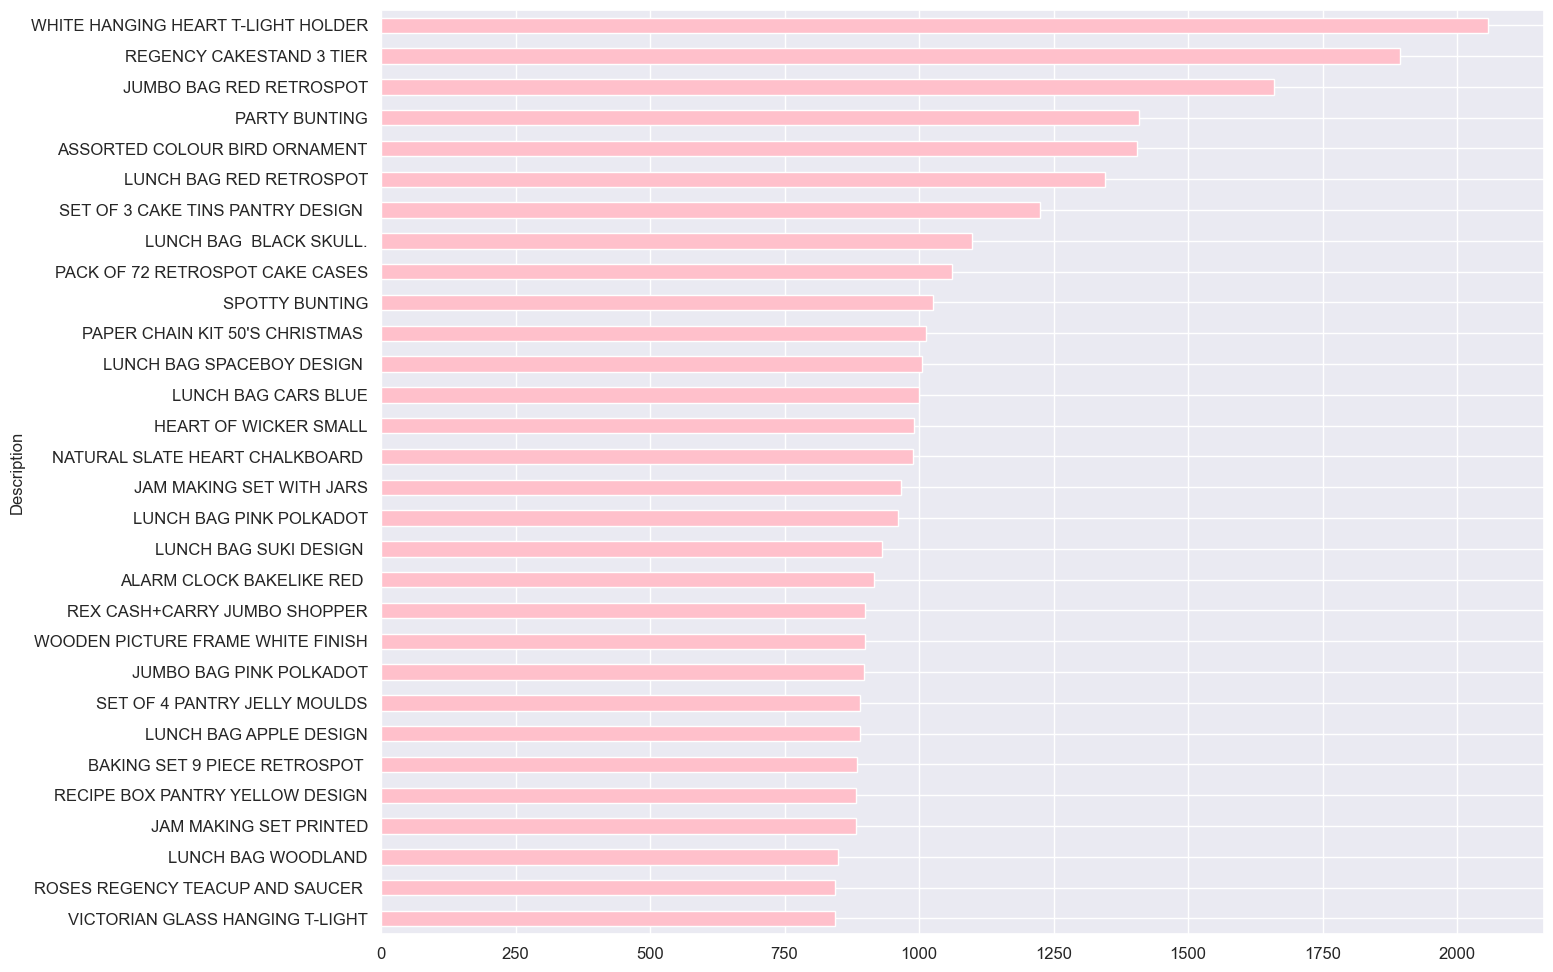

In [132]:
plt.figure(figsize=(15,12))
top_30.plot(kind="barh",color="pink",fontsize=12)
plt.gca().invert_yaxis()
plt.show()

In [133]:
a.sample()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
12400,537852,22487,WHITE WOOD GARDEN PLANT LADDER,4,12/8/2010 15:56,8.5,17340.0,United Kingdom,Completed


In [134]:
description_counts=a["Description"].value_counts()

In [135]:
top_30_descriptions=description_counts[:30]

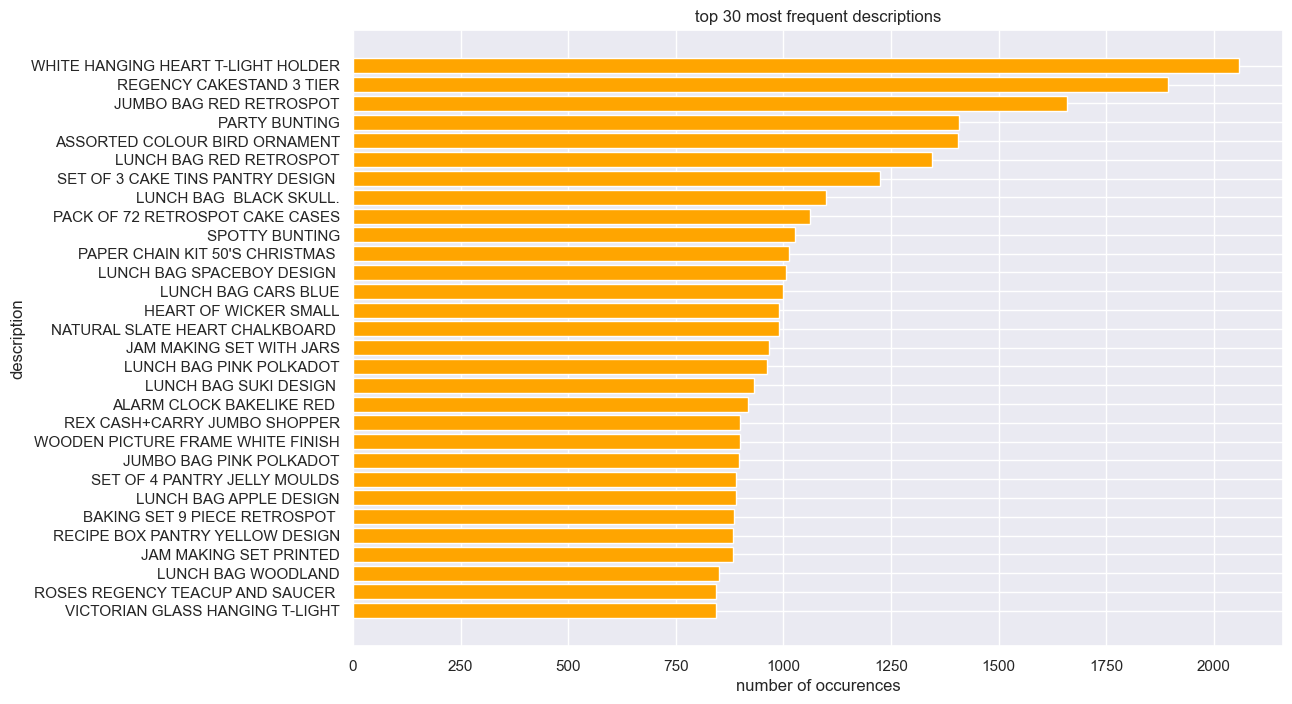

In [136]:
plt.figure(figsize=(12,8))
plt.barh(top_30_descriptions.index[::-1],top_30_descriptions.values[::-1],color="orange")
plt.title("top 30 most frequent descriptions")
plt.xlabel("number of occurences")
plt.ylabel("description")
plt.show()


In [137]:
a["Description"].str.lower()

0          white hanging heart t-light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4              red woolly hottie white heart.
                         ...                 
401599            pack of 20 spaceboy napkins
401600           children's apron dolly girl 
401601          childrens cutlery dolly girl 
401602        childrens cutlery circus parade
401603          baking set 9 piece retrospot 
Name: Description, Length: 399689, dtype: object

In [138]:
lower=a["Description"].unique()

In [139]:
lower

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [140]:
lower=[i  for i in lower if any(j.islower()   for j in i)]
print("the uique descriptions conatining lowercase characters are")
print("-"*50)
for l in lower:
    print(l)

the uique descriptions conatining lowercase characters are
--------------------------------------------------
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


In [141]:
lowercase_descriptions = a['Description'].unique()
lowercase_descriptions = [desc for desc in lowercase_descriptions if any(char.islower() for char in desc)]
print("The unique descriptions containing lowercase characters are:")
print("-"*60)
for desc in lowercase_descriptions:
    print(desc)


The unique descriptions containing lowercase characters are:
------------------------------------------------------------
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


In [142]:
k=["Next Day Carriage","High Resolution Image"]
g=a[a["Description"].isin(k)]

In [143]:
g

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
144738,554835,23444,Next Day Carriage,1,5/26/2011 16:11,15.0,15241.0,United Kingdom,Completed
147881,555251,23444,Next Day Carriage,1,6/1/2011 15:12,15.0,13062.0,United Kingdom,Completed
148271,555312,23444,Next Day Carriage,1,6/2/2011 10:39,15.0,16484.0,United Kingdom,Completed
148619,555367,23444,Next Day Carriage,1,6/2/2011 14:28,15.0,17900.0,United Kingdom,Completed
154208,555948,23444,Next Day Carriage,1,6/8/2011 10:49,30.0,13752.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
390975,580622,23444,Next Day Carriage,1,12/5/2011 12:09,15.0,17006.0,United Kingdom,Completed
390988,580630,23444,Next Day Carriage,1,12/5/2011 12:11,15.0,12913.0,United Kingdom,Completed
397230,581132,23444,Next Day Carriage,1,12/7/2011 12:55,15.0,17590.0,United Kingdom,Completed
398522,581221,23444,Next Day Carriage,1,12/8/2011 9:40,15.0,17856.0,United Kingdom,Completed


In [144]:
percentage=(a["Description"].isin(k).sum()/len(a))*100

In [145]:
percentage

0.02076614567826485

In [146]:
service_related_descriptions = ["Next Day Carriage", "High Resolution Image"]

# Calculate the percentage of records with service-related descriptions
service_related_percentage = df[df['Description'].isin(service_related_descriptions)].shape[0] / df.shape[0] * 100


In [147]:
service_related_percentage

0.02076614567826485

In [148]:
print(f"The percentage of records with service-related descriptions in the dataset is:{percentage:.2f}%")

The percentage of records with service-related descriptions in the dataset is:0.02%


In [149]:
i=a[~a["Description"].isin(service_related_descriptions)]

In [150]:
i

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,Completed
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,Completed
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,Completed
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,Completed


In [151]:
i["Description"].str.upper()

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
401599            PACK OF 20 SPACEBOY NAPKINS
401600           CHILDREN'S APRON DOLLY GIRL 
401601          CHILDRENS CUTLERY DOLLY GIRL 
401602        CHILDRENS CUTLERY CIRCUS PARADE
401603          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 399606, dtype: object

In [152]:
service_related_descriptions = ["Next Day Carriage", "High Resolution Image"]

# Calculate the percentage of records with service-related descriptions
service_related_percentage = a[a['Description'].isin(service_related_descriptions)].shape[0] / a.shape[0] * 100

# Print the percentage of records with service-related descriptions
print(f"The percentage of records with service-related descriptions in the dataset is: {service_related_percentage:.2f}%")

# Remove rows with service-related information in the description
a = a[~a['Description'].isin(service_related_descriptions)]

# Standardize the text to uppercase to maintain uniformity across the dataset
a['Description'] = a['Description'].str.upper()

The percentage of records with service-related descriptions in the dataset is: 0.02%


In [153]:
a

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,Completed
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,Completed
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,Completed
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,Completed


In [154]:
a.shape[0]

399606

In [155]:
a.shape

(399606, 9)

In [156]:
a.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed


In [157]:
a["UnitPrice"].describe()

count    399606.000000
mean          2.904957
std           4.448796
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

In [158]:
g=a.loc[a["UnitPrice"]>=1]

In [159]:
g

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
401598,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,12/9/2011 12:50,4.15,12680.0,France,Completed
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,Completed
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,Completed
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,Completed


In [160]:
g.describe()

,Quantity,UnitPrice,CustomerID
count,306819.000000,306819.000000,306819.000000
mean,9.399167,3.601615,15293.007604
std,282.451444,4.865395,1708.418266
min,-80995.000000,1.000000,12346.000000
25%,2.000000,1.650000,13971.000000
50%,4.000000,2.460000,15150.000000
75%,10.000000,4.250000,16794.000000
max,80995.000000,649.500000,18287.000000


In [161]:
a[a["UnitPrice"]==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
6842,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany,Completed
22619,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom,Completed
25551,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,EIRE,Completed
29374,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom,Completed
29376,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom,Completed
34903,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/2011 15:10,0.0,15107.0,United Kingdom,Completed
54482,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/2011 13:08,0.0,17560.0,United Kingdom,Completed
86760,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/2011 10:25,0.0,13239.0,United Kingdom,Completed
93947,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/2011 12:45,0.0,13113.0,United Kingdom,Completed
98634,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/2011 14:42,0.0,14410.0,United Kingdom,Completed


In [162]:
a[a["UnitPrice"]==0].describe()[["Quantity"]]

,Quantity
count,33.000000
mean,420.515152
std,2176.713608
min,1.000000
25%,2.000000
50%,11.000000
75%,36.000000
max,12540.000000


In [163]:
a=a[a["UnitPrice"]>0]

In [164]:
a

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,Completed
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,Completed
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,Completed
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,Completed


In [165]:
a.describe()

,Quantity,UnitPrice,CustomerID
count,399573.000000,399573.000000,399573.000000
mean,12.197999,2.905197,15288.749708
std,250.088282,4.448902,1710.796921
min,-80995.000000,0.030000,12346.000000
25%,2.000000,1.250000,13959.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,649.500000,18287.000000


In [166]:
a.reset_index(drop=True,inplace=True)

In [167]:
a

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
399568,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,Completed
399569,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,Completed
399570,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,Completed
399571,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,Completed


In [168]:
a.shape[0]

399573

In [169]:
a.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed


In [170]:
a.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate            object
UnitPrice             float64
CustomerID            float64
Country                object
transaction_status     object
dtype: object

In [171]:
a["InvoiceDate"]=a["InvoiceDate"].astype("datetime64[ns]")

In [172]:
a

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
399568,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed
399569,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed
399570,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed
399571,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed


In [173]:
a.dtypes

InvoiceNo                     object
StockCode                     object
Description                   object
Quantity                       int64
InvoiceDate           datetime64[ns]
UnitPrice                    float64
CustomerID                   float64
Country                       object
transaction_status            object
dtype: object

In [174]:
a["Invoice_Day"]=a["InvoiceDate"].dt.day

In [175]:
a

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,Invoice_Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,1
...,...,...,...,...,...,...,...,...,...,...
399568,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed,9
399569,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed,9
399570,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,9
399571,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,9


In [176]:
p=a.groupby("CustomerID")["Invoice_Day"].max().reset_index()

In [177]:
p

,CustomerID,Invoice_Day
0,12346.0,18
1,12347.0,31
2,12348.0,25
3,12349.0,21
4,12350.0,2
...,...,...
4357,18280.0,7
4358,18281.0,12
4359,18282.0,9
4360,18283.0,30


In [178]:
p["Invoice_Day"]=pd.to_datetime(p["Invoice_Day"])

In [179]:
p

,CustomerID,Invoice_Day
0,12346.0,1970-01-01 00:00:00.000000018
1,12347.0,1970-01-01 00:00:00.000000031
2,12348.0,1970-01-01 00:00:00.000000025
3,12349.0,1970-01-01 00:00:00.000000021
4,12350.0,1970-01-01 00:00:00.000000002
...,...,...
4357,18280.0,1970-01-01 00:00:00.000000007
4358,18281.0,1970-01-01 00:00:00.000000012
4359,18282.0,1970-01-01 00:00:00.000000009
4360,18283.0,1970-01-01 00:00:00.000000030


In [180]:
most_recent=a["Invoice_Day"].max()

In [181]:
most_recent

31

In [182]:
most_recent=pd.to_datetime(most_recent)

In [183]:
most_recent

Timestamp('1970-01-01 00:00:00.000000031')

In [184]:
p["days_since_last_purchase"]=(most_recent-p["Invoice_Day"]).dt.days


In [185]:
p

,CustomerID,Invoice_Day,days_since_last_purchase
0,12346.0,1970-01-01 00:00:00.000000018,0
1,12347.0,1970-01-01 00:00:00.000000031,0
2,12348.0,1970-01-01 00:00:00.000000025,0
3,12349.0,1970-01-01 00:00:00.000000021,0
4,12350.0,1970-01-01 00:00:00.000000002,0
...,...,...,...
4357,18280.0,1970-01-01 00:00:00.000000007,0
4358,18281.0,1970-01-01 00:00:00.000000012,0
4359,18282.0,1970-01-01 00:00:00.000000009,0
4360,18283.0,1970-01-01 00:00:00.000000030,0


In [186]:
p.drop(["Invoice_Day"],axis=1,inplace=True)

In [187]:
p

,CustomerID,days_since_last_purchase
0,12346.0,0
1,12347.0,0
2,12348.0,0
3,12349.0,0
4,12350.0,0
...,...,...
4357,18280.0,0
4358,18281.0,0
4359,18282.0,0
4360,18283.0,0


In [188]:
p.head()

,CustomerID,days_since_last_purchase
0,12346.0,0
1,12347.0,0
2,12348.0,0
3,12349.0,0
4,12350.0,0


In [189]:
a['InvoiceDate'] = pd.to_datetime(a['InvoiceDate'])

In [190]:
a

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,Invoice_Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,1
...,...,...,...,...,...,...,...,...,...,...
399568,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed,9
399569,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed,9
399570,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,9
399571,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,9


In [191]:
a['InvoiceDay'] = a['InvoiceDate'].dt.date


In [192]:
a

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,Invoice_Day,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,1,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,1,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,1,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,1,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,1,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...
399568,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed,9,2011-12-09
399569,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed,9,2011-12-09
399570,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,9,2011-12-09
399571,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,9,2011-12-09


In [193]:
p["InvoiceDay"]=a["InvoiceDate"].dt.date

In [194]:
p


,CustomerID,days_since_last_purchase,InvoiceDay
0,12346.0,0,2010-12-01
1,12347.0,0,2010-12-01
2,12348.0,0,2010-12-01
3,12349.0,0,2010-12-01
4,12350.0,0,2010-12-01
...,...,...,...
4357,18280.0,0,2010-12-03
4358,18281.0,0,2010-12-03
4359,18282.0,0,2010-12-03
4360,18283.0,0,2010-12-03


In [195]:
customer_data = a.groupby('CustomerID')['InvoiceDay'].max().reset_index()

In [196]:
customer_data

,CustomerID,InvoiceDay
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4357,18280.0,2011-03-07
4358,18281.0,2011-06-12
4359,18282.0,2011-12-02
4360,18283.0,2011-12-06


In [197]:
most_recent_date = a['InvoiceDay'].max()

In [198]:
most_recent_date

datetime.date(2011, 12, 9)

In [199]:
customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
most_recent_date = pd.to_datetime(most_recent_date)

In [200]:
customer_data

,CustomerID,InvoiceDay
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4357,18280.0,2011-03-07
4358,18281.0,2011-06-12
4359,18282.0,2011-12-02
4360,18283.0,2011-12-06


In [201]:
most_recent_date

Timestamp('2011-12-09 00:00:00')

In [202]:
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDay']).dt.days


In [203]:
customer_data

,CustomerID,InvoiceDay,Days_Since_Last_Purchase
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310
...,...,...,...
4357,18280.0,2011-03-07,277
4358,18281.0,2011-06-12,180
4359,18282.0,2011-12-02,7
4360,18283.0,2011-12-06,3


In [204]:
customer_data.head()

,CustomerID,InvoiceDay,Days_Since_Last_Purchase
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310


In [205]:
a.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,Invoice_Day,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,1,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,1,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,1,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,1,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,1,2010-12-01


In [206]:
a.drop(["Invoice_Day","InvoiceDay"],axis=1,inplace=True)

In [207]:
a

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
399568,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed
399569,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed
399570,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed
399571,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed


In [208]:
a.dtypes

InvoiceNo                     object
StockCode                     object
Description                   object
Quantity                       int64
InvoiceDate           datetime64[ns]
UnitPrice                    float64
CustomerID                   float64
Country                       object
transaction_status            object
dtype: object

In [209]:
a["InvoiceDate"]=a["InvoiceDate"].astype(str)

In [210]:
a

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
399568,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed
399569,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed
399570,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed
399571,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed


In [211]:
a.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate            object
UnitPrice             float64
CustomerID            float64
Country                object
transaction_status     object
dtype: object

In [212]:
a["InvoiceDate"]=pd.to_datetime(a["InvoiceDate"])

In [213]:
a

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
399568,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed
399569,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed
399570,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed
399571,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed


In [214]:
a.dtypes

InvoiceNo                     object
StockCode                     object
Description                   object
Quantity                       int64
InvoiceDate           datetime64[ns]
UnitPrice                    float64
CustomerID                   float64
Country                       object
transaction_status            object
dtype: object

In [215]:
a["invoice_date"]=a["InvoiceDate"].dt.date

In [216]:
a

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,invoice_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
399568,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed,2011-12-09
399569,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed,2011-12-09
399570,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09
399571,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09


In [217]:
most_recentdate=a["invoice_date"].max()

In [218]:
most_recentdate

datetime.date(2011, 12, 9)

In [219]:
j=a.groupby(["CustomerID"])["invoice_date"].max().reset_index()

In [220]:
j

,CustomerID,invoice_date
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4357,18280.0,2011-03-07
4358,18281.0,2011-06-12
4359,18282.0,2011-12-02
4360,18283.0,2011-12-06


In [221]:
j["invoice_date"]=j["invoice_date"].astype("datetime64[ns]")

In [222]:
j

,CustomerID,invoice_date
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4357,18280.0,2011-03-07
4358,18281.0,2011-06-12
4359,18282.0,2011-12-02
4360,18283.0,2011-12-06


In [223]:
most_recentdate=pd.to_datetime(most_recentdate)

In [224]:
most_recentdate

Timestamp('2011-12-09 00:00:00')

In [225]:
j["Days_Since_Last_Purchase"]=(most_recentdate-j["invoice_date"]).dt.days

In [226]:
j

,CustomerID,invoice_date,Days_Since_Last_Purchase
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310
...,...,...,...
4357,18280.0,2011-03-07,277
4358,18281.0,2011-06-12,180
4359,18282.0,2011-12-02,7
4360,18283.0,2011-12-06,3


In [227]:
j.drop(["invoice_date"],axis=1,inplace=True)

In [228]:
j

,CustomerID,Days_Since_Last_Purchase
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310
...,...,...
4357,18280.0,277
4358,18281.0,180
4359,18282.0,7
4360,18283.0,3


In [229]:
j.head()

,CustomerID,Days_Since_Last_Purchase
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


In [230]:
a.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,invoice_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01


In [231]:
total=a.groupby(["CustomerID"])["InvoiceNo"].nunique().reset_index()

In [232]:
total

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4357,18280.0,1
4358,18281.0,1
4359,18282.0,3
4360,18283.0,16


In [233]:
total.sort_values("InvoiceNo",ascending=0)

,CustomerID,InvoiceNo
1891,14911.0,242
328,12748.0,217
4033,17841.0,169
1670,14606.0,125
566,13089.0,118
...,...,...
1634,14552.0,1
3223,16721.0,1
3222,16720.0,1
1643,14566.0,1


In [234]:
total.rename(columns={"InvoiceNo":"no.of transactions"},inplace=True)

In [235]:
total

,CustomerID,no.of transactions
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4357,18280.0,1
4358,18281.0,1
4359,18282.0,3
4360,18283.0,16


In [236]:
a.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,invoice_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01


In [237]:
l=a.groupby(["CustomerID"])["Quantity"].sum().reset_index()

In [238]:
l

,CustomerID,Quantity
0,12346.0,0
1,12347.0,2458
2,12348.0,2332
3,12349.0,630
4,12350.0,196
...,...,...
4357,18280.0,45
4358,18281.0,54
4359,18282.0,98
4360,18283.0,1355


In [239]:
l.rename(columns={"Quantity":"total_products_purchased"},inplace=True)

In [240]:
l

,CustomerID,total_products_purchased
0,12346.0,0
1,12347.0,2458
2,12348.0,2332
3,12349.0,630
4,12350.0,196
...,...,...
4357,18280.0,45
4358,18281.0,54
4359,18282.0,98
4360,18283.0,1355


In [241]:
s=pd.merge(j,l,on="CustomerID")

In [242]:
s

,CustomerID,Days_Since_Last_Purchase,total_products_purchased
0,12346.0,325,0
1,12347.0,2,2458
2,12348.0,75,2332
3,12349.0,18,630
4,12350.0,310,196
...,...,...,...
4357,18280.0,277,45
4358,18281.0,180,54
4359,18282.0,7,98
4360,18283.0,3,1355


In [243]:
s=pd.merge(j,total,on="CustomerID")

In [244]:
s

,CustomerID,Days_Since_Last_Purchase,no.of transactions
0,12346.0,325,2
1,12347.0,2,7
2,12348.0,75,4
3,12349.0,18,1
4,12350.0,310,1
...,...,...,...
4357,18280.0,277,1
4358,18281.0,180,1
4359,18282.0,7,3
4360,18283.0,3,16


In [245]:
s

,CustomerID,Days_Since_Last_Purchase,no.of transactions
0,12346.0,325,2
1,12347.0,2,7
2,12348.0,75,4
3,12349.0,18,1
4,12350.0,310,1
...,...,...,...
4357,18280.0,277,1
4358,18281.0,180,1
4359,18282.0,7,3
4360,18283.0,3,16


In [246]:
total_transactions = a.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

In [247]:
total_transactions

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4357,18280.0,1
4358,18281.0,1
4359,18282.0,3
4360,18283.0,16


In [248]:
total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)

In [249]:
total_transactions

,CustomerID,Total_Transactions
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4357,18280.0,1
4358,18281.0,1
4359,18282.0,3
4360,18283.0,16


In [250]:
total_products_purchased = a.groupby('CustomerID')['Quantity'].sum().reset_index()

In [251]:
total_products_purchased

,CustomerID,Quantity
0,12346.0,0
1,12347.0,2458
2,12348.0,2332
3,12349.0,630
4,12350.0,196
...,...,...
4357,18280.0,45
4358,18281.0,54
4359,18282.0,98
4360,18283.0,1355


In [252]:
total_products_purchased.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)

In [253]:
customer_data = pd.merge(customer_data, total_transactions, on='CustomerID')

In [254]:
customer_data = pd.merge(customer_data, total_products_purchased, on='CustomerID')

In [255]:
customer_data

,CustomerID,InvoiceDay,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased
0,12346.0,2011-01-18,325,2,0
1,12347.0,2011-12-07,2,7,2458
2,12348.0,2011-09-25,75,4,2332
3,12349.0,2011-11-21,18,1,630
4,12350.0,2011-02-02,310,1,196
...,...,...,...,...,...
4357,18280.0,2011-03-07,277,1,45
4358,18281.0,2011-06-12,180,1,54
4359,18282.0,2011-12-02,7,3,98
4360,18283.0,2011-12-06,3,16,1355


In [256]:
customer_data.head()

,CustomerID,InvoiceDay,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased
0,12346.0,2011-01-18,325,2,0
1,12347.0,2011-12-07,2,7,2458
2,12348.0,2011-09-25,75,4,2332
3,12349.0,2011-11-21,18,1,630
4,12350.0,2011-02-02,310,1,196


In [257]:
a.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,invoice_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01


In [258]:
a["total_money_spent"]=a["UnitPrice"]*a["Quantity"]

In [259]:
a

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,invoice_date,total_money_spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34
...,...,...,...,...,...,...,...,...,...,...,...
399568,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed,2011-12-09,10.20
399569,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed,2011-12-09,12.60
399570,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60
399571,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60


In [260]:
total_spend=a.groupby(["CustomerID"])["total_money_spent"].sum().reset_index()

In [261]:
total_spend

,CustomerID,total_money_spent
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1437.24
3,12349.0,1457.55
4,12350.0,294.40
...,...,...
4357,18280.0,180.60
4358,18281.0,80.82
4359,18282.0,176.60
4360,18283.0,2039.58


In [262]:
total_spend.sort_values("total_money_spent",ascending=0)

,CustomerID,total_money_spent
1699,14646.0,278778.02
4223,18102.0,259657.30
3749,17450.0,189575.53
1891,14911.0,128768.24
55,12415.0,123638.18
...,...,...
262,12666.0,-227.44
2885,16252.0,-295.09
3238,16742.0,-464.90
2571,15823.0,-811.86


In [263]:
avg=total_spend.merge(total_spend,on="CustomerID")

In [264]:
avg

,CustomerID,total_money_spent_x,total_money_spent_y
0,12346.0,0.00,0.00
1,12347.0,4310.00,4310.00
2,12348.0,1437.24,1437.24
3,12349.0,1457.55,1457.55
4,12350.0,294.40,294.40
...,...,...,...
4357,18280.0,180.60,180.60
4358,18281.0,80.82,80.82
4359,18282.0,176.60,176.60
4360,18283.0,2039.58,2039.58


In [265]:
total_transactions

,CustomerID,Total_Transactions
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4357,18280.0,1
4358,18281.0,1
4359,18282.0,3
4360,18283.0,16


In [266]:
avg=total_spend.merge(total_transactions,on="CustomerID")

In [267]:
avg

,CustomerID,total_money_spent,Total_Transactions
0,12346.0,0.00,2
1,12347.0,4310.00,7
2,12348.0,1437.24,4
3,12349.0,1457.55,1
4,12350.0,294.40,1
...,...,...,...
4357,18280.0,180.60,1
4358,18281.0,80.82,1
4359,18282.0,176.60,3
4360,18283.0,2039.58,16


In [268]:
avg['avg'] = avg['total_money_spent'] /avg['Total_Transactions']

In [269]:
avg

,CustomerID,total_money_spent,Total_Transactions,avg
0,12346.0,0.00,2,0.000000
1,12347.0,4310.00,7,615.714286
2,12348.0,1437.24,4,359.310000
3,12349.0,1457.55,1,1457.550000
4,12350.0,294.40,1,294.400000
...,...,...,...,...
4357,18280.0,180.60,1,180.600000
4358,18281.0,80.82,1,80.820000
4359,18282.0,176.60,3,58.866667
4360,18283.0,2039.58,16,127.473750


In [270]:
s=pd.merge(j,total_spend,on="CustomerID")

In [271]:
s

,CustomerID,Days_Since_Last_Purchase,total_money_spent
0,12346.0,325,0.00
1,12347.0,2,4310.00
2,12348.0,75,1437.24
3,12349.0,18,1457.55
4,12350.0,310,294.40
...,...,...,...
4357,18280.0,277,180.60
4358,18281.0,180,80.82
4359,18282.0,7,176.60
4360,18283.0,3,2039.58


In [272]:
s=pd.merge(j,avg,on='CustomerID')

In [273]:
s

,CustomerID,Days_Since_Last_Purchase,total_money_spent,Total_Transactions,avg
0,12346.0,325,0.00,2,0.000000
1,12347.0,2,4310.00,7,615.714286
2,12348.0,75,1437.24,4,359.310000
3,12349.0,18,1457.55,1,1457.550000
4,12350.0,310,294.40,1,294.400000
...,...,...,...,...,...
4357,18280.0,277,180.60,1,180.600000
4358,18281.0,180,80.82,1,80.820000
4359,18282.0,7,176.60,3,58.866667
4360,18283.0,3,2039.58,16,127.473750


In [274]:
a['Total_Spend'] = a['UnitPrice'] * a['Quantity']

In [275]:
a

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,invoice_date,total_money_spent,Total_Spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
399568,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed,2011-12-09,10.20,10.20
399569,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed,2011-12-09,12.60,12.60
399570,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60,16.60
399571,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60,16.60


In [276]:
total_spend = a.groupby('CustomerID')['Total_Spend'].sum().reset_index()


In [277]:
total_spend 

,CustomerID,Total_Spend
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1437.24
3,12349.0,1457.55
4,12350.0,294.40
...,...,...
4357,18280.0,180.60
4358,18281.0,80.82
4359,18282.0,176.60
4360,18283.0,2039.58


In [278]:
average_transaction_value = total_spend.merge(total_transactions, on='CustomerID')

In [279]:
average_transaction_value

,CustomerID,Total_Spend,Total_Transactions
0,12346.0,0.00,2
1,12347.0,4310.00,7
2,12348.0,1437.24,4
3,12349.0,1457.55,1
4,12350.0,294.40,1
...,...,...,...
4357,18280.0,180.60,1
4358,18281.0,80.82,1
4359,18282.0,176.60,3
4360,18283.0,2039.58,16


In [280]:
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_Transactions']

In [281]:
average_transaction_value

,CustomerID,Total_Spend,Total_Transactions,Average_Transaction_Value
0,12346.0,0.00,2,0.000000
1,12347.0,4310.00,7,615.714286
2,12348.0,1437.24,4,359.310000
3,12349.0,1457.55,1,1457.550000
4,12350.0,294.40,1,294.400000
...,...,...,...,...
4357,18280.0,180.60,1,180.600000
4358,18281.0,80.82,1,80.820000
4359,18282.0,176.60,3,58.866667
4360,18283.0,2039.58,16,127.473750


In [282]:
customer_data = pd.merge(customer_data, total_spend, on='CustomerID')

In [283]:
customer_data

,CustomerID,InvoiceDay,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend
0,12346.0,2011-01-18,325,2,0,0.00
1,12347.0,2011-12-07,2,7,2458,4310.00
2,12348.0,2011-09-25,75,4,2332,1437.24
3,12349.0,2011-11-21,18,1,630,1457.55
4,12350.0,2011-02-02,310,1,196,294.40
...,...,...,...,...,...,...
4357,18280.0,2011-03-07,277,1,45,180.60
4358,18281.0,2011-06-12,180,1,54,80.82
4359,18282.0,2011-12-02,7,3,98,176.60
4360,18283.0,2011-12-06,3,16,1355,2039.58


In [284]:
customer_data = pd.merge(customer_data, average_transaction_value[['CustomerID', 'Average_Transaction_Value']], on='CustomerID')

In [285]:
customer_data

,CustomerID,InvoiceDay,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value
0,12346.0,2011-01-18,325,2,0,0.00,0.000000
1,12347.0,2011-12-07,2,7,2458,4310.00,615.714286
2,12348.0,2011-09-25,75,4,2332,1437.24,359.310000
3,12349.0,2011-11-21,18,1,630,1457.55,1457.550000
4,12350.0,2011-02-02,310,1,196,294.40,294.400000
...,...,...,...,...,...,...,...
4357,18280.0,2011-03-07,277,1,45,180.60,180.600000
4358,18281.0,2011-06-12,180,1,54,80.82,80.820000
4359,18282.0,2011-12-02,7,3,98,176.60,58.866667
4360,18283.0,2011-12-06,3,16,1355,2039.58,127.473750


In [286]:
customer_data.head()

,CustomerID,InvoiceDay,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value
0,12346.0,2011-01-18,325,2,0,0.00,0.000000
1,12347.0,2011-12-07,2,7,2458,4310.00,615.714286
2,12348.0,2011-09-25,75,4,2332,1437.24,359.310000
3,12349.0,2011-11-21,18,1,630,1457.55,1457.550000
4,12350.0,2011-02-02,310,1,196,294.40,294.400000


In [287]:
a.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,invoice_date,total_money_spent,Total_Spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34


In [288]:
q=a.groupby(["CustomerID"])["StockCode"].nunique().reset_index()

In [289]:
q

,CustomerID,StockCode
0,12346.0,1
1,12347.0,103
2,12348.0,21
3,12349.0,72
4,12350.0,16
...,...,...
4357,18280.0,10
4358,18281.0,7
4359,18282.0,12
4360,18283.0,262


In [290]:
q.sort_values("StockCode",ascending=False)

,CustomerID,StockCode
1891,14911.0,1791
328,12748.0,1767
4033,17841.0,1330
1296,14096.0,1118
1443,14298.0,884
...,...,...
2041,15118.0,1
575,13099.0,1
3560,17186.0,1
4231,18113.0,1


In [291]:
q.rename(columns={"StockCode":"unique_product_purchased"},inplace=True)

In [292]:
q

,CustomerID,unique_product_purchased
0,12346.0,1
1,12347.0,103
2,12348.0,21
3,12349.0,72
4,12350.0,16
...,...,...
4357,18280.0,10
4358,18281.0,7
4359,18282.0,12
4360,18283.0,262


In [293]:
s=pd.merge(total,q,on="CustomerID")

In [294]:
s

,CustomerID,no.of transactions,unique_product_purchased
0,12346.0,2,1
1,12347.0,7,103
2,12348.0,4,21
3,12349.0,1,72
4,12350.0,1,16
...,...,...,...
4357,18280.0,1,10
4358,18281.0,1,7
4359,18282.0,3,12
4360,18283.0,16,262


In [295]:
s.head()

,CustomerID,no.of transactions,unique_product_purchased
0,12346.0,2,1
1,12347.0,7,103
2,12348.0,4,21
3,12349.0,1,72
4,12350.0,1,16


In [296]:
unique_products_purchased = a.groupby('CustomerID')['StockCode'].nunique().reset_index()

In [297]:
unique_products_purchased

,CustomerID,StockCode
0,12346.0,1
1,12347.0,103
2,12348.0,21
3,12349.0,72
4,12350.0,16
...,...,...
4357,18280.0,10
4358,18281.0,7
4359,18282.0,12
4360,18283.0,262


In [298]:
unique_products_purchased.rename(columns={'StockCode': 'Unique_Products_Purchased'}, inplace=True)

In [299]:
unique_products_purchased

,CustomerID,Unique_Products_Purchased
0,12346.0,1
1,12347.0,103
2,12348.0,21
3,12349.0,72
4,12350.0,16
...,...,...
4357,18280.0,10
4358,18281.0,7
4359,18282.0,12
4360,18283.0,262


In [300]:
customer_data = pd.merge(customer_data, unique_products_purchased, on='CustomerID')

In [301]:
customer_data

,CustomerID,InvoiceDay,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased
0,12346.0,2011-01-18,325,2,0,0.00,0.000000,1
1,12347.0,2011-12-07,2,7,2458,4310.00,615.714286,103
2,12348.0,2011-09-25,75,4,2332,1437.24,359.310000,21
3,12349.0,2011-11-21,18,1,630,1457.55,1457.550000,72
4,12350.0,2011-02-02,310,1,196,294.40,294.400000,16
...,...,...,...,...,...,...,...,...
4357,18280.0,2011-03-07,277,1,45,180.60,180.600000,10
4358,18281.0,2011-06-12,180,1,54,80.82,80.820000,7
4359,18282.0,2011-12-02,7,3,98,176.60,58.866667,12
4360,18283.0,2011-12-06,3,16,1355,2039.58,127.473750,262


In [302]:
customer_data.head()

,CustomerID,InvoiceDay,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased
0,12346.0,2011-01-18,325,2,0,0.00,0.000000,1
1,12347.0,2011-12-07,2,7,2458,4310.00,615.714286,103
2,12348.0,2011-09-25,75,4,2332,1437.24,359.310000,21
3,12349.0,2011-11-21,18,1,630,1457.55,1457.550000,72
4,12350.0,2011-02-02,310,1,196,294.40,294.400000,16


In [303]:
p=a.copy()

In [304]:
p

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,invoice_date,total_money_spent,Total_Spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
399568,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed,2011-12-09,10.20,10.20
399569,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed,2011-12-09,12.60,12.60
399570,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60,16.60
399571,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60,16.60


In [305]:
p["day_of_week"]=p["InvoiceDate"].dt.dayofweek

In [306]:
p

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,invoice_date,total_money_spent,Total_Spend,day_of_week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01,15.30,15.30,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01,22.00,22.00,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399568,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed,2011-12-09,10.20,10.20,4
399569,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed,2011-12-09,12.60,12.60,4
399570,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60,16.60,4
399571,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60,16.60,4


In [307]:
p["dayname"]=p["InvoiceDate"].dt.day_name()

In [308]:
p

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,invoice_date,total_money_spent,Total_Spend,day_of_week,dayname
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01,15.30,15.30,2,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01,22.00,22.00,2,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399568,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed,2011-12-09,10.20,10.20,4,Friday
399569,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed,2011-12-09,12.60,12.60,4,Friday
399570,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60,16.60,4,Friday
399571,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60,16.60,4,Friday


In [309]:
p["hour"]=p["InvoiceDate"].dt.hour

In [310]:
p["InvoiceDay"]=p["InvoiceDate"].dt.date

In [311]:
p

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,invoice_date,total_money_spent,Total_Spend,day_of_week,dayname,hour,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01,15.30,15.30,2,Wednesday,8,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,Wednesday,8,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01,22.00,22.00,2,Wednesday,8,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,Wednesday,8,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,Wednesday,8,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399568,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed,2011-12-09,10.20,10.20,4,Friday,12,2011-12-09
399569,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed,2011-12-09,12.60,12.60,4,Friday,12,2011-12-09
399570,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60,16.60,4,Friday,12,2011-12-09
399571,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60,16.60,4,Friday,12,2011-12-09


In [312]:
a['Day_Of_Week'] = a['InvoiceDate'].dt.dayofweek

In [313]:
a

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,invoice_date,total_money_spent,Total_Spend,Day_Of_Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01,15.30,15.30,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01,22.00,22.00,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399568,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed,2011-12-09,10.20,10.20,4
399569,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed,2011-12-09,12.60,12.60,4
399570,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60,16.60,4
399571,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60,16.60,4


In [314]:
a['Hour'] = a['InvoiceDate'].dt.hour

In [315]:
a

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,invoice_date,total_money_spent,Total_Spend,Day_Of_Week,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01,15.30,15.30,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01,22.00,22.00,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399568,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed,2011-12-09,10.20,10.20,4,12
399569,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed,2011-12-09,12.60,12.60,4,12
399570,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60,16.60,4,12
399571,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60,16.60,4,12


In [316]:
days_between_purchases = a.groupby('CustomerID')['invoice_date'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))

In [317]:
days_between_purchases

CustomerID        
12346.0     37339      0
12347.0     10363      0
            10364      0
            10365      0
            10366      0
                      ..
18287.0     286817     0
            286818     0
            312503    16
            312504     0
            312505     0
Name: invoice_date, Length: 395211, dtype: int64

In [318]:
p

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,invoice_date,total_money_spent,Total_Spend,day_of_week,dayname,hour,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01,15.30,15.30,2,Wednesday,8,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,Wednesday,8,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01,22.00,22.00,2,Wednesday,8,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,Wednesday,8,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,Wednesday,8,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399568,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed,2011-12-09,10.20,10.20,4,Friday,12,2011-12-09
399569,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed,2011-12-09,12.60,12.60,4,Friday,12,2011-12-09
399570,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60,16.60,4,Friday,12,2011-12-09
399571,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60,16.60,4,Friday,12,2011-12-09


In [319]:
between=p.groupby(["CustomerID"])["InvoiceDay"].apply(lambda x:(x.diff().dropna()).apply(lambda y:y.days))


In [320]:
between=between.reset_index()

In [321]:
between

,CustomerID,level_1,InvoiceDay
0,12346.0,37339,0
1,12347.0,10363,0
2,12347.0,10364,0
3,12347.0,10365,0
4,12347.0,10366,0
...,...,...,...
395206,18287.0,286817,0
395207,18287.0,286818,0
395208,18287.0,312503,16
395209,18287.0,312504,0


In [322]:
average=between.groupby("CustomerID").mean().reset_index()

In [323]:
average

,CustomerID,level_1,InvoiceDay
0,12346.0,37339.000000,0.000000
1,12347.0,168442.436464,2.016575
2,12348.0,56397.461538,10.884615
3,12349.0,360152.000000,0.000000
4,12350.0,49760.000000,0.000000
...,...,...,...
4277,18280.0,72575.000000,0.000000
4278,18281.0,156707.500000,0.000000
4279,18282.0,281000.666667,9.916667
4280,18283.0,224868.965181,0.465181


In [324]:
average.rename(columns={"InvoiceDay":"Average_Days_Between_Purchases"},inplace=True)

In [325]:
average

,CustomerID,level_1,Average_Days_Between_Purchases
0,12346.0,37339.000000,0.000000
1,12347.0,168442.436464,2.016575
2,12348.0,56397.461538,10.884615
3,12349.0,360152.000000,0.000000
4,12350.0,49760.000000,0.000000
...,...,...,...
4277,18280.0,72575.000000,0.000000
4278,18281.0,156707.500000,0.000000
4279,18282.0,281000.666667,9.916667
4280,18283.0,224868.965181,0.465181


In [326]:
p.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,invoice_date,total_money_spent,Total_Spend,day_of_week,dayname,hour,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01,15.30,15.30,2,Wednesday,8,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,Wednesday,8,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01,22.00,22.00,2,Wednesday,8,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,Wednesday,8,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,Wednesday,8,2010-12-01


In [327]:
favor_day=p.groupby(["CustomerID","day_of_week"]).size().reset_index(name="count")

In [328]:
favor_day

,CustomerID,day_of_week,count
0,12346.0,1,2
1,12347.0,0,47
2,12347.0,1,53
3,12347.0,2,40
4,12347.0,3,42
...,...,...,...
10606,18283.0,3,337
10607,18283.0,6,44
10608,18287.0,2,38
10609,18287.0,4,3


In [329]:
favor_day = favor_day.loc[favor_day.groupby('CustomerID')['count'].idxmax()][['CustomerID', 'day_of_week']]

In [330]:
favor_day

,CustomerID,day_of_week
0,12346.0,1
2,12347.0,1
6,12348.0,3
8,12349.0,0
9,12350.0,2
...,...,...
10599,18280.0,0
10600,18281.0,6
10602,18282.0,4
10606,18283.0,3


In [331]:
p.sample()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,invoice_date,total_money_spent,Total_Spend,day_of_week,dayname,hour,InvoiceDay
49906,543040,84849D,HOT BATHS SOAP HOLDER,1,2011-02-02 17:06:00,1.69,17337.0,United Kingdom,Completed,2011-02-02,1.69,1.69,2,Wednesday,17,2011-02-02


In [332]:
fav_hour=p.groupby(["CustomerID","hour"]).size().reset_index()

In [333]:
fav_hour

,CustomerID,hour,0
0,12346.0,10,2
1,12347.0,8,22
2,12347.0,10,24
3,12347.0,12,47
4,12347.0,13,18
...,...,...,...
12564,18283.0,15,1
12565,18283.0,16,54
12566,18283.0,19,76
12567,18287.0,9,3


In [334]:
fav_hour.rename(columns={0:"count"},inplace=True)

In [335]:
fav_hour

,CustomerID,hour,count
0,12346.0,10,2
1,12347.0,8,22
2,12347.0,10,24
3,12347.0,12,47
4,12347.0,13,18
...,...,...,...
12564,18283.0,15,1
12565,18283.0,16,54
12566,18283.0,19,76
12567,18287.0,9,3


In [336]:
fav_hour=fav_hour.loc[fav_hour.groupby(["CustomerID"])["count"].idxmax()][["CustomerID","hour"]]

In [337]:
fav_hour

,CustomerID,hour
0,12346.0,10
5,12347.0,14
9,12348.0,19
10,12349.0,9
11,12350.0,16
...,...,...
12554,18280.0,9
12555,18281.0,10
12557,18282.0,13
12563,18283.0,14


In [338]:
s=pd.merge(s,fav_hour,on="CustomerID")

In [339]:
s

,CustomerID,no.of transactions,unique_product_purchased,hour
0,12346.0,2,1,10
1,12347.0,7,103,14
2,12348.0,4,21,19
3,12349.0,1,72,9
4,12350.0,1,16,16
...,...,...,...,...
4357,18280.0,1,10,9
4358,18281.0,1,7,10
4359,18282.0,3,12,13
4360,18283.0,16,262,14


In [340]:
s=pd.merge(s,favor_day,on="CustomerID")

In [341]:
s

,CustomerID,no.of transactions,unique_product_purchased,hour,day_of_week
0,12346.0,2,1,10,1
1,12347.0,7,103,14,1
2,12348.0,4,21,19,3
3,12349.0,1,72,9,0
4,12350.0,1,16,16,2
...,...,...,...,...,...
4357,18280.0,1,10,9,0
4358,18281.0,1,7,10,6
4359,18282.0,3,12,13,4
4360,18283.0,16,262,14,3


In [342]:
s=pd.merge(s,l,on="CustomerID")

In [343]:
s

,CustomerID,no.of transactions,unique_product_purchased,hour,day_of_week,total_products_purchased
0,12346.0,2,1,10,1,0
1,12347.0,7,103,14,1,2458
2,12348.0,4,21,19,3,2332
3,12349.0,1,72,9,0,630
4,12350.0,1,16,16,2,196
...,...,...,...,...,...,...
4357,18280.0,1,10,9,0,45
4358,18281.0,1,7,10,6,54
4359,18282.0,3,12,13,4,98
4360,18283.0,16,262,14,3,1355


In [344]:
s=pd.merge(s,j,on="CustomerID")

In [345]:
s

,CustomerID,no.of transactions,unique_product_purchased,hour,day_of_week,total_products_purchased,Days_Since_Last_Purchase
0,12346.0,2,1,10,1,0,325
1,12347.0,7,103,14,1,2458,2
2,12348.0,4,21,19,3,2332,75
3,12349.0,1,72,9,0,630,18
4,12350.0,1,16,16,2,196,310
...,...,...,...,...,...,...,...
4357,18280.0,1,10,9,0,45,277
4358,18281.0,1,7,10,6,54,180
4359,18282.0,3,12,13,4,98,7
4360,18283.0,16,262,14,3,1355,3


In [346]:
s.head()

,CustomerID,no.of transactions,unique_product_purchased,hour,day_of_week,total_products_purchased,Days_Since_Last_Purchase
0,12346.0,2,1,10,1,0,325
1,12347.0,7,103,14,1,2458,2
2,12348.0,4,21,19,3,2332,75
3,12349.0,1,72,9,0,630,18
4,12350.0,1,16,16,2,196,310


In [347]:
a['Day_Of_Week'] = a['InvoiceDate'].dt.dayofweek

In [348]:
a

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,invoice_date,total_money_spent,Total_Spend,Day_Of_Week,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01,15.30,15.30,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01,22.00,22.00,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399568,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed,2011-12-09,10.20,10.20,4,12
399569,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed,2011-12-09,12.60,12.60,4,12
399570,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60,16.60,4,12
399571,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60,16.60,4,12


In [349]:
a['Hour'] = a['InvoiceDate'].dt.hour

In [350]:
a

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,invoice_date,total_money_spent,Total_Spend,Day_Of_Week,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01,15.30,15.30,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01,22.00,22.00,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399568,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed,2011-12-09,10.20,10.20,4,12
399569,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed,2011-12-09,12.60,12.60,4,12
399570,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60,16.60,4,12
399571,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60,16.60,4,12


In [351]:
days_between_purchases = a.groupby('CustomerID')['invoice_date'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))


In [352]:
days_between_purchases 

CustomerID        
12346.0     37339      0
12347.0     10363      0
            10364      0
            10365      0
            10366      0
                      ..
18287.0     286817     0
            286818     0
            312503    16
            312504     0
            312505     0
Name: invoice_date, Length: 395211, dtype: int64

In [353]:
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()

In [354]:
average_days_between_purchases

,CustomerID,invoice_date
0,12346.0,0.000000
1,12347.0,2.016575
2,12348.0,10.884615
3,12349.0,0.000000
4,12350.0,0.000000
...,...,...
4277,18280.0,0.000000
4278,18281.0,0.000000
4279,18282.0,9.916667
4280,18283.0,0.465181


In [355]:
average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)


In [356]:
average_days_between_purchases

,CustomerID,invoice_date
0,12346.0,0.000000
1,12347.0,2.016575
2,12348.0,10.884615
3,12349.0,0.000000
4,12350.0,0.000000
...,...,...
4277,18280.0,0.000000
4278,18281.0,0.000000
4279,18282.0,9.916667
4280,18283.0,0.465181


In [357]:
favorite_shopping_day = a.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')

In [358]:
favorite_shopping_day

,CustomerID,Day_Of_Week,Count
0,12346.0,1,2
1,12347.0,0,47
2,12347.0,1,53
3,12347.0,2,40
4,12347.0,3,42
...,...,...,...
10606,18283.0,3,337
10607,18283.0,6,44
10608,18287.0,2,38
10609,18287.0,4,3


In [359]:
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]

In [360]:
favorite_shopping_day

,CustomerID,Day_Of_Week
0,12346.0,1
2,12347.0,1
6,12348.0,3
8,12349.0,0
9,12350.0,2
...,...,...
10599,18280.0,0
10600,18281.0,6
10602,18282.0,4
10606,18283.0,3


In [361]:
favorite_shopping_hour = a.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')

In [362]:
favorite_shopping_hour

,CustomerID,Hour,Count
0,12346.0,10,2
1,12347.0,8,22
2,12347.0,10,24
3,12347.0,12,47
4,12347.0,13,18
...,...,...,...
12564,18283.0,15,1
12565,18283.0,16,54
12566,18283.0,19,76
12567,18287.0,9,3


In [363]:
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]

In [364]:
favorite_shopping_hour

,CustomerID,Hour
0,12346.0,10
5,12347.0,14
9,12348.0,19
10,12349.0,9
11,12350.0,16
...,...,...
12554,18280.0,9
12555,18281.0,10
12557,18282.0,13
12563,18283.0,14


In [365]:
customer_data = pd.merge(customer_data, average_days_between_purchases, on='CustomerID')

In [366]:
customer_data

,CustomerID,InvoiceDay,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,invoice_date
0,12346.0,2011-01-18,325,2,0,0.00,0.000000,1,0.000000
1,12347.0,2011-12-07,2,7,2458,4310.00,615.714286,103,2.016575
2,12348.0,2011-09-25,75,4,2332,1437.24,359.310000,21,10.884615
3,12349.0,2011-11-21,18,1,630,1457.55,1457.550000,72,0.000000
4,12350.0,2011-02-02,310,1,196,294.40,294.400000,16,0.000000
...,...,...,...,...,...,...,...,...,...
4277,18280.0,2011-03-07,277,1,45,180.60,180.600000,10,0.000000
4278,18281.0,2011-06-12,180,1,54,80.82,80.820000,7,0.000000
4279,18282.0,2011-12-02,7,3,98,176.60,58.866667,12,9.916667
4280,18283.0,2011-12-06,3,16,1355,2039.58,127.473750,262,0.465181


In [367]:
customer_data = pd.merge(customer_data, favorite_shopping_day, on='CustomerID')

In [368]:
customer_data

,CustomerID,InvoiceDay,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,invoice_date,Day_Of_Week
0,12346.0,2011-01-18,325,2,0,0.00,0.000000,1,0.000000,1
1,12347.0,2011-12-07,2,7,2458,4310.00,615.714286,103,2.016575,1
2,12348.0,2011-09-25,75,4,2332,1437.24,359.310000,21,10.884615,3
3,12349.0,2011-11-21,18,1,630,1457.55,1457.550000,72,0.000000,0
4,12350.0,2011-02-02,310,1,196,294.40,294.400000,16,0.000000,2
...,...,...,...,...,...,...,...,...,...,...
4277,18280.0,2011-03-07,277,1,45,180.60,180.600000,10,0.000000,0
4278,18281.0,2011-06-12,180,1,54,80.82,80.820000,7,0.000000,6
4279,18282.0,2011-12-02,7,3,98,176.60,58.866667,12,9.916667,4
4280,18283.0,2011-12-06,3,16,1355,2039.58,127.473750,262,0.465181,3


In [369]:
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='CustomerID')

In [370]:
customer_data

,CustomerID,InvoiceDay,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,invoice_date,Day_Of_Week,Hour
0,12346.0,2011-01-18,325,2,0,0.00,0.000000,1,0.000000,1,10
1,12347.0,2011-12-07,2,7,2458,4310.00,615.714286,103,2.016575,1,14
2,12348.0,2011-09-25,75,4,2332,1437.24,359.310000,21,10.884615,3,19
3,12349.0,2011-11-21,18,1,630,1457.55,1457.550000,72,0.000000,0,9
4,12350.0,2011-02-02,310,1,196,294.40,294.400000,16,0.000000,2,16
...,...,...,...,...,...,...,...,...,...,...,...
4277,18280.0,2011-03-07,277,1,45,180.60,180.600000,10,0.000000,0,9
4278,18281.0,2011-06-12,180,1,54,80.82,80.820000,7,0.000000,6,10
4279,18282.0,2011-12-02,7,3,98,176.60,58.866667,12,9.916667,4,13
4280,18283.0,2011-12-06,3,16,1355,2039.58,127.473750,262,0.465181,3,14


In [371]:
customer_data.head()

,CustomerID,InvoiceDay,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,invoice_date,Day_Of_Week,Hour
0,12346.0,2011-01-18,325,2,0,0.00,0.000000,1,0.000000,1,10
1,12347.0,2011-12-07,2,7,2458,4310.00,615.714286,103,2.016575,1,14
2,12348.0,2011-09-25,75,4,2332,1437.24,359.310000,21,10.884615,3,19
3,12349.0,2011-11-21,18,1,630,1457.55,1457.550000,72,0.000000,0,9
4,12350.0,2011-02-02,310,1,196,294.40,294.400000,16,0.000000,2,16


In [372]:
a.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,invoice_date,total_money_spent,Total_Spend,Day_Of_Week,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01,15.30,15.30,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01,22.00,22.00,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,8


In [373]:
p.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,invoice_date,total_money_spent,Total_Spend,day_of_week,dayname,hour,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01,15.30,15.30,2,Wednesday,8,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,Wednesday,8,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01,22.00,22.00,2,Wednesday,8,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,Wednesday,8,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,Wednesday,8,2010-12-01


In [374]:
p["Country"].value_counts()

Country
United Kingdom          356008
Germany                   9079
France                    8152
EIRE                      7368
Spain                     2462
Netherlands               2326
Belgium                   1971
Switzerland               1843
Portugal                  1427
Australia                 1253
Norway                    1059
Italy                      783
Channel Islands            752
Finland                    653
Cyprus                     608
Sweden                     436
Austria                    387
Denmark                    375
Japan                      355
Poland                     336
USA                        291
Israel                     247
Unspecified                241
Singapore                  215
Iceland                    182
Canada                     150
Greece                     142
Malta                      123
United Arab Emirates        67
European Community          58
RSA                         57
Lebanon                     45


In [375]:
a["Country"].value_counts()

Country
United Kingdom          356008
Germany                   9079
France                    8152
EIRE                      7368
Spain                     2462
Netherlands               2326
Belgium                   1971
Switzerland               1843
Portugal                  1427
Australia                 1253
Norway                    1059
Italy                      783
Channel Islands            752
Finland                    653
Cyprus                     608
Sweden                     436
Austria                    387
Denmark                    375
Japan                      355
Poland                     336
USA                        291
Israel                     247
Unspecified                241
Singapore                  215
Iceland                    182
Canada                     150
Greece                     142
Malta                      123
United Arab Emirates        67
European Community          58
RSA                         57
Lebanon                     45


In [376]:
a["Country"].value_counts(normalize=True)

Country
United Kingdom          0.890971
Germany                 0.022722
France                  0.020402
EIRE                    0.018440
Spain                   0.006162
Netherlands             0.005821
Belgium                 0.004933
Switzerland             0.004612
Portugal                0.003571
Australia               0.003136
Norway                  0.002650
Italy                   0.001960
Channel Islands         0.001882
Finland                 0.001634
Cyprus                  0.001522
Sweden                  0.001091
Austria                 0.000969
Denmark                 0.000939
Japan                   0.000888
Poland                  0.000841
USA                     0.000728
Israel                  0.000618
Unspecified             0.000603
Singapore               0.000538
Iceland                 0.000455
Canada                  0.000375
Greece                  0.000355
Malta                   0.000308
United Arab Emirates    0.000168
European Community      0.000145
RS

In [377]:
p.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,invoice_date,total_money_spent,Total_Spend,day_of_week,dayname,hour,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01,15.30,15.30,2,Wednesday,8,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,Wednesday,8,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01,22.00,22.00,2,Wednesday,8,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,Wednesday,8,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,Wednesday,8,2010-12-01


In [378]:
cutomer_country=a.groupby(["CustomerID","Country"]).size().reset_index(name ="no.of transactions")

In [379]:
cutomer_country

,CustomerID,Country,no.of transactions
0,12346.0,United Kingdom,2
1,12347.0,Iceland,182
2,12348.0,Finland,27
3,12349.0,Italy,72
4,12350.0,Norway,16
...,...,...,...
4365,18280.0,United Kingdom,10
4366,18281.0,United Kingdom,7
4367,18282.0,United Kingdom,13
4368,18283.0,United Kingdom,719


In [380]:
cutomer_main_country=cutomer_country.sort_values("no.of transactions",ascending=0)

In [381]:
cutomer_main_country

,CustomerID,Country,no.of transactions
4041,17841.0,United Kingdom,7800
1899,14911.0,EIRE,5806
1304,14096.0,United Kingdom,5095
336,12748.0,United Kingdom,4440
1678,14606.0,United Kingdom,2755
...,...,...,...
2527,15753.0,United Kingdom,1
647,13185.0,United Kingdom,1
650,13188.0,United Kingdom,1
1117,13841.0,United Kingdom,1


In [382]:
cutomer_main_country=cutomer_main_country.drop_duplicates("CustomerID")

In [383]:
cutomer_main_country

,CustomerID,Country,no.of transactions
4041,17841.0,United Kingdom,7800
1899,14911.0,EIRE,5806
1304,14096.0,United Kingdom,5095
336,12748.0,United Kingdom,4440
1678,14606.0,United Kingdom,2755
...,...,...,...
2527,15753.0,United Kingdom,1
647,13185.0,United Kingdom,1
650,13188.0,United Kingdom,1
1117,13841.0,United Kingdom,1


In [384]:
cutomer_main_country["U-K"]=np.where(cutomer_main_country["Country"]=="United Kingdom",1,0)

In [385]:
cutomer_main_country

,CustomerID,Country,no.of transactions,U-K
4041,17841.0,United Kingdom,7800,1
1899,14911.0,EIRE,5806,0
1304,14096.0,United Kingdom,5095,1
336,12748.0,United Kingdom,4440,1
1678,14606.0,United Kingdom,2755,1
...,...,...,...,...
2527,15753.0,United Kingdom,1,1
647,13185.0,United Kingdom,1,1
650,13188.0,United Kingdom,1,1
1117,13841.0,United Kingdom,1,1


In [386]:
cutomer_main_country.head()

,CustomerID,Country,no.of transactions,U-K
4041,17841.0,United Kingdom,7800,1
1899,14911.0,EIRE,5806,0
1304,14096.0,United Kingdom,5095,1
336,12748.0,United Kingdom,4440,1
1678,14606.0,United Kingdom,2755,1


In [387]:
s=pd.merge(s,cutomer_main_country[["CustomerID","U-K"]],on="CustomerID")

In [388]:
s

,CustomerID,no.of transactions,unique_product_purchased,hour,day_of_week,total_products_purchased,Days_Since_Last_Purchase,U-K
0,12346.0,2,1,10,1,0,325,1
1,12347.0,7,103,14,1,2458,2,0
2,12348.0,4,21,19,3,2332,75,0
3,12349.0,1,72,9,0,630,18,0
4,12350.0,1,16,16,2,196,310,0
...,...,...,...,...,...,...,...,...
4357,18280.0,1,10,9,0,45,277,1
4358,18281.0,1,7,10,6,54,180,1
4359,18282.0,3,12,13,4,98,7,1
4360,18283.0,16,262,14,3,1355,3,1


In [389]:
s=pd.merge(s,cutomer_main_country[["CustomerID","U-K"]],on="CustomerID",how="left")

In [390]:
s

,CustomerID,no.of transactions,unique_product_purchased,hour,day_of_week,total_products_purchased,Days_Since_Last_Purchase,U-K_x,U-K_y
0,12346.0,2,1,10,1,0,325,1,1
1,12347.0,7,103,14,1,2458,2,0,0
2,12348.0,4,21,19,3,2332,75,0,0
3,12349.0,1,72,9,0,630,18,0,0
4,12350.0,1,16,16,2,196,310,0,0
...,...,...,...,...,...,...,...,...,...
4357,18280.0,1,10,9,0,45,277,1,1
4358,18281.0,1,7,10,6,54,180,1,1
4359,18282.0,3,12,13,4,98,7,1,1
4360,18283.0,16,262,14,3,1355,3,1,1


In [391]:
s.drop("U-K_y",axis=1,inplace=True)

In [392]:
s.rename(columns={"U-K_x":"U-k"},inplace=True)

In [393]:
s=pd.merge(s,avg,on="CustomerID")

In [394]:
s

,CustomerID,no.of transactions,unique_product_purchased,hour,day_of_week,total_products_purchased,Days_Since_Last_Purchase,U-k,total_money_spent,Total_Transactions,avg
0,12346.0,2,1,10,1,0,325,1,0.00,2,0.000000
1,12347.0,7,103,14,1,2458,2,0,4310.00,7,615.714286
2,12348.0,4,21,19,3,2332,75,0,1437.24,4,359.310000
3,12349.0,1,72,9,0,630,18,0,1457.55,1,1457.550000
4,12350.0,1,16,16,2,196,310,0,294.40,1,294.400000
...,...,...,...,...,...,...,...,...,...,...,...
4357,18280.0,1,10,9,0,45,277,1,180.60,1,180.600000
4358,18281.0,1,7,10,6,54,180,1,80.82,1,80.820000
4359,18282.0,3,12,13,4,98,7,1,176.60,3,58.866667
4360,18283.0,16,262,14,3,1355,3,1,2039.58,16,127.473750


In [395]:
customer_country = a.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')

In [396]:
customer_country

,CustomerID,Country,Number_of_Transactions
0,12346.0,United Kingdom,2
1,12347.0,Iceland,182
2,12348.0,Finland,27
3,12349.0,Italy,72
4,12350.0,Norway,16
...,...,...,...
4365,18280.0,United Kingdom,10
4366,18281.0,United Kingdom,7
4367,18282.0,United Kingdom,13
4368,18283.0,United Kingdom,719


In [397]:
customer_main_country = customer_country.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('CustomerID')

In [398]:
customer_main_country

,CustomerID,Country,Number_of_Transactions
4041,17841.0,United Kingdom,7800
1899,14911.0,EIRE,5806
1304,14096.0,United Kingdom,5095
336,12748.0,United Kingdom,4440
1678,14606.0,United Kingdom,2755
...,...,...,...
2527,15753.0,United Kingdom,1
647,13185.0,United Kingdom,1
650,13188.0,United Kingdom,1
1117,13841.0,United Kingdom,1


In [399]:
customer_main_country['Is_UK'] = customer_main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

In [400]:
customer_main_country

,CustomerID,Country,Number_of_Transactions,Is_UK
4041,17841.0,United Kingdom,7800,1
1899,14911.0,EIRE,5806,0
1304,14096.0,United Kingdom,5095,1
336,12748.0,United Kingdom,4440,1
1678,14606.0,United Kingdom,2755,1
...,...,...,...,...
2527,15753.0,United Kingdom,1,1
647,13185.0,United Kingdom,1,1
650,13188.0,United Kingdom,1,1
1117,13841.0,United Kingdom,1,1


In [401]:
customer_data = pd.merge(customer_data, customer_main_country[['CustomerID', 'Is_UK']], on='CustomerID', how='left')

In [402]:
customer_data

,CustomerID,InvoiceDay,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,invoice_date,Day_Of_Week,Hour,Is_UK
0,12346.0,2011-01-18,325,2,0,0.00,0.000000,1,0.000000,1,10,1
1,12347.0,2011-12-07,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0
2,12348.0,2011-09-25,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0
3,12349.0,2011-11-21,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0
4,12350.0,2011-02-02,310,1,196,294.40,294.400000,16,0.000000,2,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4277,18280.0,2011-03-07,277,1,45,180.60,180.600000,10,0.000000,0,9,1
4278,18281.0,2011-06-12,180,1,54,80.82,80.820000,7,0.000000,6,10,1
4279,18282.0,2011-12-02,7,3,98,176.60,58.866667,12,9.916667,4,13,1
4280,18283.0,2011-12-06,3,16,1355,2039.58,127.473750,262,0.465181,3,14,1


In [403]:
customer_main_country["Is_UK"].value_counts()

Is_UK
1    3942
0     420
Name: count, dtype: int64

In [404]:
p.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,invoice_date,total_money_spent,Total_Spend,day_of_week,dayname,hour,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01,15.30,15.30,2,Wednesday,8,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,Wednesday,8,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01,22.00,22.00,2,Wednesday,8,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,Wednesday,8,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,Wednesday,8,2010-12-01


In [405]:
total=p.groupby("CustomerID")["InvoiceNo"].nunique().reset_index()

In [406]:
total

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4357,18280.0,1
4358,18281.0,1
4359,18282.0,3
4360,18283.0,16


In [407]:
p.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,invoice_date,total_money_spent,Total_Spend,day_of_week,dayname,hour,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01,15.30,15.30,2,Wednesday,8,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,Wednesday,8,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01,22.00,22.00,2,Wednesday,8,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,Wednesday,8,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,Wednesday,8,2010-12-01


In [408]:
cancelled_transactions =p[p["transaction_status"]=="Cancelled"]

In [409]:
cancelled_transactions

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,invoice_date,total_money_spent,Total_Spend,day_of_week,dayname,hour,InvoiceDay
152,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,Cancelled,2010-12-01,-4.65,-4.65,2,Wednesday,9,2010-12-01
233,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,Cancelled,2010-12-01,-19.80,-19.80,2,Wednesday,10,2010-12-01
234,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Cancelled,2010-12-01,-6.96,-6.96,2,Wednesday,10,2010-12-01
235,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Cancelled,2010-12-01,-6.96,-6.96,2,Wednesday,10,2010-12-01
236,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Cancelled,2010-12-01,-6.96,-6.96,2,Wednesday,10,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399133,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom,Cancelled,2011-12-09,-23.40,-23.40,4,Friday,9,2011-12-09
399134,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,Cancelled,2011-12-09,-9.13,-9.13,4,Friday,9,2011-12-09
399382,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,Cancelled,2011-12-09,-54.75,-54.75,4,Friday,11,2011-12-09
399383,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,Cancelled,2011-12-09,-1.25,-1.25,4,Friday,11,2011-12-09


In [410]:
cancelled_frequency=cancelled_transactions.groupby(["CustomerID"])["InvoiceNo"].nunique().reset_index()

In [411]:
cancelled_frequency

,CustomerID,InvoiceNo
0,12346.0,1
1,12352.0,1
2,12359.0,2
3,12362.0,3
4,12375.0,1
...,...,...
1529,18272.0,1
1530,18274.0,1
1531,18276.0,2
1532,18277.0,1


In [412]:
cancelled_frequency.rename(columns={"InvoiceNo":"cancelled_frequency"},inplace=True)

In [413]:
cancelled_frequency

,CustomerID,cancelled_frequency
0,12346.0,1
1,12352.0,1
2,12359.0,2
3,12362.0,3
4,12375.0,1
...,...,...
1529,18272.0,1
1530,18274.0,1
1531,18276.0,2
1532,18277.0,1


In [414]:
s=pd.merge(s,cancelled_frequency,on="CustomerID",how="left")

In [415]:
s

,CustomerID,no.of transactions,unique_product_purchased,hour,day_of_week,total_products_purchased,Days_Since_Last_Purchase,U-k,total_money_spent,Total_Transactions,avg,cancelled_frequency
0,12346.0,2,1,10,1,0,325,1,0.00,2,0.000000,1.0
1,12347.0,7,103,14,1,2458,2,0,4310.00,7,615.714286,NaN
2,12348.0,4,21,19,3,2332,75,0,1437.24,4,359.310000,NaN
3,12349.0,1,72,9,0,630,18,0,1457.55,1,1457.550000,NaN
4,12350.0,1,16,16,2,196,310,0,294.40,1,294.400000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4357,18280.0,1,10,9,0,45,277,1,180.60,1,180.600000,NaN
4358,18281.0,1,7,10,6,54,180,1,80.82,1,80.820000,NaN
4359,18282.0,3,12,13,4,98,7,1,176.60,3,58.866667,1.0
4360,18283.0,16,262,14,3,1355,3,1,2039.58,16,127.473750,NaN


In [416]:
s.isna().sum()

CustomerID                     0
no.of transactions             0
unique_product_purchased       0
hour                           0
day_of_week                    0
total_products_purchased       0
Days_Since_Last_Purchase       0
U-k                            0
total_money_spent              0
Total_Transactions             0
avg                            0
cancelled_frequency         2828
dtype: int64

In [417]:
s["cancelled_frequency"].fillna(0,inplace=True)

In [418]:
s

,CustomerID,no.of transactions,unique_product_purchased,hour,day_of_week,total_products_purchased,Days_Since_Last_Purchase,U-k,total_money_spent,Total_Transactions,avg,cancelled_frequency
0,12346.0,2,1,10,1,0,325,1,0.00,2,0.000000,1.0
1,12347.0,7,103,14,1,2458,2,0,4310.00,7,615.714286,0.0
2,12348.0,4,21,19,3,2332,75,0,1437.24,4,359.310000,0.0
3,12349.0,1,72,9,0,630,18,0,1457.55,1,1457.550000,0.0
4,12350.0,1,16,16,2,196,310,0,294.40,1,294.400000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4357,18280.0,1,10,9,0,45,277,1,180.60,1,180.600000,0.0
4358,18281.0,1,7,10,6,54,180,1,80.82,1,80.820000,0.0
4359,18282.0,3,12,13,4,98,7,1,176.60,3,58.866667,1.0
4360,18283.0,16,262,14,3,1355,3,1,2039.58,16,127.473750,0.0


In [419]:
s["cancellation_rate"]=s["cancelled_frequency"]/total["InvoiceNo"]

In [420]:
s

,CustomerID,no.of transactions,unique_product_purchased,hour,day_of_week,total_products_purchased,Days_Since_Last_Purchase,U-k,total_money_spent,Total_Transactions,avg,cancelled_frequency,cancellation_rate
0,12346.0,2,1,10,1,0,325,1,0.00,2,0.000000,1.0,0.500000
1,12347.0,7,103,14,1,2458,2,0,4310.00,7,615.714286,0.0,0.000000
2,12348.0,4,21,19,3,2332,75,0,1437.24,4,359.310000,0.0,0.000000
3,12349.0,1,72,9,0,630,18,0,1457.55,1,1457.550000,0.0,0.000000
4,12350.0,1,16,16,2,196,310,0,294.40,1,294.400000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4357,18280.0,1,10,9,0,45,277,1,180.60,1,180.600000,0.0,0.000000
4358,18281.0,1,7,10,6,54,180,1,80.82,1,80.820000,0.0,0.000000
4359,18282.0,3,12,13,4,98,7,1,176.60,3,58.866667,1.0,0.333333
4360,18283.0,16,262,14,3,1355,3,1,2039.58,16,127.473750,0.0,0.000000


In [421]:
s.head()

,CustomerID,no.of transactions,unique_product_purchased,hour,day_of_week,total_products_purchased,Days_Since_Last_Purchase,U-k,total_money_spent,Total_Transactions,avg,cancelled_frequency,cancellation_rate
0,12346.0,2,1,10,1,0,325,1,0.00,2,0.000000,1.0,0.5
1,12347.0,7,103,14,1,2458,2,0,4310.00,7,615.714286,0.0,0.0
2,12348.0,4,21,19,3,2332,75,0,1437.24,4,359.310000,0.0,0.0
3,12349.0,1,72,9,0,630,18,0,1457.55,1,1457.550000,0.0,0.0
4,12350.0,1,16,16,2,196,310,0,294.40,1,294.400000,0.0,0.0


In [422]:
total_transactions = a.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

In [423]:
total_transactions

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4357,18280.0,1
4358,18281.0,1
4359,18282.0,3
4360,18283.0,16


In [424]:
a.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,invoice_date,total_money_spent,Total_Spend,Day_Of_Week,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01,15.30,15.30,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01,22.00,22.00,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,8


In [425]:
cancelled_transactions = a[a['transaction_status'] == 'Cancelled']

In [426]:
cancelled_transactions

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,invoice_date,total_money_spent,Total_Spend,Day_Of_Week,Hour
152,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,Cancelled,2010-12-01,-4.65,-4.65,2,9
233,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,Cancelled,2010-12-01,-19.80,-19.80,2,10
234,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Cancelled,2010-12-01,-6.96,-6.96,2,10
235,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Cancelled,2010-12-01,-6.96,-6.96,2,10
236,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Cancelled,2010-12-01,-6.96,-6.96,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399133,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom,Cancelled,2011-12-09,-23.40,-23.40,4,9
399134,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,Cancelled,2011-12-09,-9.13,-9.13,4,9
399382,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,Cancelled,2011-12-09,-54.75,-54.75,4,11
399383,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,Cancelled,2011-12-09,-1.25,-1.25,4,11


In [427]:
cancellation_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

In [428]:
cancellation_frequency

,CustomerID,InvoiceNo
0,12346.0,1
1,12352.0,1
2,12359.0,2
3,12362.0,3
4,12375.0,1
...,...,...
1529,18272.0,1
1530,18274.0,1
1531,18276.0,2
1532,18277.0,1


In [429]:
cancellation_frequency.rename(columns={'InvoiceNo': 'Cancellation_Frequency'}, inplace=True)

In [430]:
cancellation_frequency

,CustomerID,Cancellation_Frequency
0,12346.0,1
1,12352.0,1
2,12359.0,2
3,12362.0,3
4,12375.0,1
...,...,...
1529,18272.0,1
1530,18274.0,1
1531,18276.0,2
1532,18277.0,1


In [431]:
customer_data = pd.merge(customer_data, cancellation_frequency, on='CustomerID', how='left')

In [432]:
customer_data

,CustomerID,InvoiceDay,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,invoice_date,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency
0,12346.0,2011-01-18,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0
1,12347.0,2011-12-07,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,NaN
2,12348.0,2011-09-25,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,NaN
3,12349.0,2011-11-21,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,NaN
4,12350.0,2011-02-02,310,1,196,294.40,294.400000,16,0.000000,2,16,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,18280.0,2011-03-07,277,1,45,180.60,180.600000,10,0.000000,0,9,1,NaN
4278,18281.0,2011-06-12,180,1,54,80.82,80.820000,7,0.000000,6,10,1,NaN
4279,18282.0,2011-12-02,7,3,98,176.60,58.866667,12,9.916667,4,13,1,1.0
4280,18283.0,2011-12-06,3,16,1355,2039.58,127.473750,262,0.465181,3,14,1,NaN


In [433]:
customer_data.isna().sum()

CustomerID                      0
InvoiceDay                      0
Days_Since_Last_Purchase        0
Total_Transactions              0
Total_Products_Purchased        0
Total_Spend                     0
Average_Transaction_Value       0
Unique_Products_Purchased       0
invoice_date                    0
Day_Of_Week                     0
Hour                            0
Is_UK                           0
Cancellation_Frequency       2759
dtype: int64

In [434]:
customer_data['Cancellation_Frequency'].fillna(0, inplace=True)

In [435]:
customer_data.isna().sum()

CustomerID                   0
InvoiceDay                   0
Days_Since_Last_Purchase     0
Total_Transactions           0
Total_Products_Purchased     0
Total_Spend                  0
Average_Transaction_Value    0
Unique_Products_Purchased    0
invoice_date                 0
Day_Of_Week                  0
Hour                         0
Is_UK                        0
Cancellation_Frequency       0
dtype: int64

In [436]:
customer_data['Cancellation_Rate'] = customer_data['Cancellation_Frequency'] / total_transactions['InvoiceNo']

In [437]:
customer_data

,CustomerID,InvoiceDay,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,invoice_date,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate
0,12346.0,2011-01-18,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.500000
1,12347.0,2011-12-07,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.000000
2,12348.0,2011-09-25,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0,0.000000
3,12349.0,2011-11-21,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.000000
4,12350.0,2011-02-02,310,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,18280.0,2011-03-07,277,1,45,180.60,180.600000,10,0.000000,0,9,1,0.0,0.000000
4278,18281.0,2011-06-12,180,1,54,80.82,80.820000,7,0.000000,6,10,1,0.0,0.000000
4279,18282.0,2011-12-02,7,3,98,176.60,58.866667,12,9.916667,4,13,1,1.0,0.142857
4280,18283.0,2011-12-06,3,16,1355,2039.58,127.473750,262,0.465181,3,14,1,0.0,0.000000


In [438]:
customer_data.head()

,CustomerID,InvoiceDay,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,invoice_date,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate
0,12346.0,2011-01-18,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5
1,12347.0,2011-12-07,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.0
2,12348.0,2011-09-25,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0,0.0
3,12349.0,2011-11-21,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.0
4,12350.0,2011-02-02,310,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.0


In [439]:
p.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,invoice_date,total_money_spent,Total_Spend,day_of_week,dayname,hour,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01,15.30,15.30,2,Wednesday,8,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,Wednesday,8,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01,22.00,22.00,2,Wednesday,8,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,Wednesday,8,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,Wednesday,8,2010-12-01


In [440]:
p["year"]=p["InvoiceDate"].dt.year


In [441]:
p

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,invoice_date,total_money_spent,Total_Spend,day_of_week,dayname,hour,InvoiceDay,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01,15.30,15.30,2,Wednesday,8,2010-12-01,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,Wednesday,8,2010-12-01,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01,22.00,22.00,2,Wednesday,8,2010-12-01,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,Wednesday,8,2010-12-01,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,Wednesday,8,2010-12-01,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399568,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed,2011-12-09,10.20,10.20,4,Friday,12,2011-12-09,2011
399569,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed,2011-12-09,12.60,12.60,4,Friday,12,2011-12-09,2011
399570,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60,16.60,4,Friday,12,2011-12-09,2011
399571,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60,16.60,4,Friday,12,2011-12-09,2011


In [442]:
p["month"]=p["InvoiceDate"].dt.month

In [443]:
p.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,invoice_date,total_money_spent,Total_Spend,day_of_week,dayname,hour,InvoiceDay,year,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01,15.30,15.30,2,Wednesday,8,2010-12-01,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,Wednesday,8,2010-12-01,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01,22.00,22.00,2,Wednesday,8,2010-12-01,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,Wednesday,8,2010-12-01,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,Wednesday,8,2010-12-01,2010,12


In [444]:
monthly_spending=p.groupby(["CustomerID","month","year"])["Total_Spend"].sum().reset_index()

In [445]:
monthly_spending

,CustomerID,month,year,Total_Spend
0,12346.0,1,2011,0.00
1,12347.0,1,2011,475.39
2,12347.0,4,2011,636.25
3,12347.0,6,2011,382.52
4,12347.0,8,2011,584.91
...,...,...,...,...
13616,18283.0,10,2011,112.99
13617,18283.0,11,2011,637.71
13618,18283.0,12,2011,208.00
13619,18287.0,5,2011,765.28


In [446]:
seasonal_patterns=monthly_spending.groupby("CustomerID")["Total_Spend"].agg(["mean","std"]).reset_index()

In [447]:
seasonal_patterns

,CustomerID,mean,std
0,12346.0,0.000000,NaN
1,12347.0,615.714286,341.070789
2,12348.0,359.310000,203.875689
3,12349.0,1457.550000,NaN
4,12350.0,294.400000,NaN
...,...,...,...
4357,18280.0,180.600000,NaN
4358,18281.0,80.820000,NaN
4359,18282.0,88.300000,14.792674
4360,18283.0,203.958000,165.798738


In [448]:
seasonal_patterns.rename(columns={"mean":"monthly_spend_mean","std":"monthly_spend_std"},inplace=True)

In [449]:
seasonal_patterns

,CustomerID,monthly_spend_mean,monthly_spend_std
0,12346.0,0.000000,NaN
1,12347.0,615.714286,341.070789
2,12348.0,359.310000,203.875689
3,12349.0,1457.550000,NaN
4,12350.0,294.400000,NaN
...,...,...,...
4357,18280.0,180.600000,NaN
4358,18281.0,80.820000,NaN
4359,18282.0,88.300000,14.792674
4360,18283.0,203.958000,165.798738


In [450]:
seasonal_patterns["monthly_spend_std"].fillna(0,inplace=True)

In [451]:
seasonal_patterns

,CustomerID,monthly_spend_mean,monthly_spend_std
0,12346.0,0.000000,0.000000
1,12347.0,615.714286,341.070789
2,12348.0,359.310000,203.875689
3,12349.0,1457.550000,0.000000
4,12350.0,294.400000,0.000000
...,...,...,...
4357,18280.0,180.600000,0.000000
4358,18281.0,80.820000,0.000000
4359,18282.0,88.300000,14.792674
4360,18283.0,203.958000,165.798738


In [452]:
def malli(spend_data):
    if len(spend_data)>1:
        x=np.arange(len(spend_data))
        slope,_,_,_,_=linregress(x,spend_data)
        return slope
    else:
        return 0

In [453]:
monthly_spending.head()

,CustomerID,month,year,Total_Spend
0,12346.0,1,2011,0.00
1,12347.0,1,2011,475.39
2,12347.0,4,2011,636.25
3,12347.0,6,2011,382.52
4,12347.0,8,2011,584.91


In [454]:
new=monthly_spending.groupby(["CustomerID"])["Total_Spend"].apply(malli).reset_index()

In [455]:
new

,CustomerID,Total_Spend
0,12346.0,0.000000
1,12347.0,11.113214
2,12348.0,133.908000
3,12349.0,0.000000
4,12350.0,0.000000
...,...,...
4357,18280.0,0.000000
4358,18281.0,0.000000
4359,18282.0,-20.920000
4360,18283.0,22.319273


In [456]:
new.rename(columns={"Total_Spend":"spending_trend"},inplace=True)

In [457]:
new

,CustomerID,spending_trend
0,12346.0,0.000000
1,12347.0,11.113214
2,12348.0,133.908000
3,12349.0,0.000000
4,12350.0,0.000000
...,...,...
4357,18280.0,0.000000
4358,18281.0,0.000000
4359,18282.0,-20.920000
4360,18283.0,22.319273


In [458]:
s=pd.merge(s,new,on="CustomerID")

In [459]:
s

,CustomerID,no.of transactions,unique_product_purchased,hour,day_of_week,total_products_purchased,Days_Since_Last_Purchase,U-k,total_money_spent,Total_Transactions,avg,cancelled_frequency,cancellation_rate,spending_trend
0,12346.0,2,1,10,1,0,325,1,0.00,2,0.000000,1.0,0.500000,0.000000
1,12347.0,7,103,14,1,2458,2,0,4310.00,7,615.714286,0.0,0.000000,11.113214
2,12348.0,4,21,19,3,2332,75,0,1437.24,4,359.310000,0.0,0.000000,133.908000
3,12349.0,1,72,9,0,630,18,0,1457.55,1,1457.550000,0.0,0.000000,0.000000
4,12350.0,1,16,16,2,196,310,0,294.40,1,294.400000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4357,18280.0,1,10,9,0,45,277,1,180.60,1,180.600000,0.0,0.000000,0.000000
4358,18281.0,1,7,10,6,54,180,1,80.82,1,80.820000,0.0,0.000000,0.000000
4359,18282.0,3,12,13,4,98,7,1,176.60,3,58.866667,1.0,0.333333,-20.920000
4360,18283.0,16,262,14,3,1355,3,1,2039.58,16,127.473750,0.0,0.000000,22.319273


In [460]:
s=pd.merge(s,seasonal_patterns,on="CustomerID")

In [461]:
s

,CustomerID,no.of transactions,unique_product_purchased,hour,day_of_week,total_products_purchased,Days_Since_Last_Purchase,U-k,total_money_spent,Total_Transactions,avg,cancelled_frequency,cancellation_rate,spending_trend,monthly_spend_mean,monthly_spend_std
0,12346.0,2,1,10,1,0,325,1,0.00,2,0.000000,1.0,0.500000,0.000000,0.000000,0.000000
1,12347.0,7,103,14,1,2458,2,0,4310.00,7,615.714286,0.0,0.000000,11.113214,615.714286,341.070789
2,12348.0,4,21,19,3,2332,75,0,1437.24,4,359.310000,0.0,0.000000,133.908000,359.310000,203.875689
3,12349.0,1,72,9,0,630,18,0,1457.55,1,1457.550000,0.0,0.000000,0.000000,1457.550000,0.000000
4,12350.0,1,16,16,2,196,310,0,294.40,1,294.400000,0.0,0.000000,0.000000,294.400000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4357,18280.0,1,10,9,0,45,277,1,180.60,1,180.600000,0.0,0.000000,0.000000,180.600000,0.000000
4358,18281.0,1,7,10,6,54,180,1,80.82,1,80.820000,0.0,0.000000,0.000000,80.820000,0.000000
4359,18282.0,3,12,13,4,98,7,1,176.60,3,58.866667,1.0,0.333333,-20.920000,88.300000,14.792674
4360,18283.0,16,262,14,3,1355,3,1,2039.58,16,127.473750,0.0,0.000000,22.319273,203.958000,165.798738


In [462]:
s.head()

,CustomerID,no.of transactions,unique_product_purchased,hour,day_of_week,total_products_purchased,Days_Since_Last_Purchase,U-k,total_money_spent,Total_Transactions,avg,cancelled_frequency,cancellation_rate,spending_trend,monthly_spend_mean,monthly_spend_std
0,12346.0,2,1,10,1,0,325,1,0.00,2,0.000000,1.0,0.5,0.000000,0.000000,0.000000
1,12347.0,7,103,14,1,2458,2,0,4310.00,7,615.714286,0.0,0.0,11.113214,615.714286,341.070789
2,12348.0,4,21,19,3,2332,75,0,1437.24,4,359.310000,0.0,0.0,133.908000,359.310000,203.875689
3,12349.0,1,72,9,0,630,18,0,1457.55,1,1457.550000,0.0,0.0,0.000000,1457.550000,0.000000
4,12350.0,1,16,16,2,196,310,0,294.40,1,294.400000,0.0,0.0,0.000000,294.400000,0.000000


In [463]:
a['Year'] = a['InvoiceDate'].dt.year

In [464]:
a['Month'] = a['InvoiceDate'].dt.month

In [465]:
a

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,invoice_date,total_money_spent,Total_Spend,Day_Of_Week,Hour,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01,15.30,15.30,2,8,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,8,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01,22.00,22.00,2,8,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,8,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,8,2010,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399568,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed,2011-12-09,10.20,10.20,4,12,2011,12
399569,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed,2011-12-09,12.60,12.60,4,12,2011,12
399570,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60,16.60,4,12,2011,12
399571,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60,16.60,4,12,2011,12


In [466]:
monthly_spending = a.groupby(['CustomerID', 'Year', 'Month'])['Total_Spend'].sum().reset_index()

In [467]:
monthly_spending

,CustomerID,Year,Month,Total_Spend
0,12346.0,2011,1,0.00
1,12347.0,2010,12,711.79
2,12347.0,2011,1,475.39
3,12347.0,2011,4,636.25
4,12347.0,2011,6,382.52
...,...,...,...,...
13616,18283.0,2011,10,112.99
13617,18283.0,2011,11,637.71
13618,18283.0,2011,12,208.00
13619,18287.0,2011,5,765.28


In [468]:
seasonal_buying_patterns = monthly_spending.groupby('CustomerID')['Total_Spend'].agg(['mean', 'std']).reset_index()

In [469]:
seasonal_buying_patterns

,CustomerID,mean,std
0,12346.0,0.000000,NaN
1,12347.0,615.714286,341.070789
2,12348.0,359.310000,203.875689
3,12349.0,1457.550000,NaN
4,12350.0,294.400000,NaN
...,...,...,...
4357,18280.0,180.600000,NaN
4358,18281.0,80.820000,NaN
4359,18282.0,88.300000,14.792674
4360,18283.0,203.958000,165.798738


In [470]:
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)



In [471]:
seasonal_buying_patterns

,CustomerID,Monthly_Spending_Mean,Monthly_Spending_Std
0,12346.0,0.000000,NaN
1,12347.0,615.714286,341.070789
2,12348.0,359.310000,203.875689
3,12349.0,1457.550000,NaN
4,12350.0,294.400000,NaN
...,...,...,...
4357,18280.0,180.600000,NaN
4358,18281.0,80.820000,NaN
4359,18282.0,88.300000,14.792674
4360,18283.0,203.958000,165.798738


In [472]:
seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

In [473]:
seasonal_buying_patterns

,CustomerID,Monthly_Spending_Mean,Monthly_Spending_Std
0,12346.0,0.000000,0.000000
1,12347.0,615.714286,341.070789
2,12348.0,359.310000,203.875689
3,12349.0,1457.550000,0.000000
4,12350.0,294.400000,0.000000
...,...,...,...
4357,18280.0,180.600000,0.000000
4358,18281.0,80.820000,0.000000
4359,18282.0,88.300000,14.792674
4360,18283.0,203.958000,165.798738


In [474]:
def calculate_trend(spend_data):
    # If there are more than one data points, we calculate the trend using linear regression
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    # If there is only one data point, no trend can be calculated, hence we return 0
    else:
        return 0

In [475]:
spending_trends = monthly_spending.groupby('CustomerID')['Total_Spend'].apply(calculate_trend).reset_index()

In [476]:
spending_trends

,CustomerID,Total_Spend
0,12346.0,0.000000
1,12347.0,4.486071
2,12348.0,-100.884000
3,12349.0,0.000000
4,12350.0,0.000000
...,...,...
4357,18280.0,0.000000
4358,18281.0,0.000000
4359,18282.0,-20.920000
4360,18283.0,22.319273


In [477]:
monthly_spending.head()

,CustomerID,Year,Month,Total_Spend
0,12346.0,2011,1,0.00
1,12347.0,2010,12,711.79
2,12347.0,2011,1,475.39
3,12347.0,2011,4,636.25
4,12347.0,2011,6,382.52


In [478]:
spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)

In [479]:
spending_trends

,CustomerID,Spending_Trend
0,12346.0,0.000000
1,12347.0,4.486071
2,12348.0,-100.884000
3,12349.0,0.000000
4,12350.0,0.000000
...,...,...
4357,18280.0,0.000000
4358,18281.0,0.000000
4359,18282.0,-20.920000
4360,18283.0,22.319273


In [480]:
customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='CustomerID')

In [481]:
customer_data

,CustomerID,InvoiceDay,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,invoice_date,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std
0,12346.0,2011-01-18,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.500000,0.000000,0.000000
1,12347.0,2011-12-07,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.000000,615.714286,341.070789
2,12348.0,2011-09-25,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0,0.000000,359.310000,203.875689
3,12349.0,2011-11-21,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.000000,1457.550000,0.000000
4,12350.0,2011-02-02,310,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.000000,294.400000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,18280.0,2011-03-07,277,1,45,180.60,180.600000,10,0.000000,0,9,1,0.0,0.000000,180.600000,0.000000
4278,18281.0,2011-06-12,180,1,54,80.82,80.820000,7,0.000000,6,10,1,0.0,0.000000,80.820000,0.000000
4279,18282.0,2011-12-02,7,3,98,176.60,58.866667,12,9.916667,4,13,1,1.0,0.142857,88.300000,14.792674
4280,18283.0,2011-12-06,3,16,1355,2039.58,127.473750,262,0.465181,3,14,1,0.0,0.000000,203.958000,165.798738


In [482]:
customer_data = pd.merge(customer_data, spending_trends, on='CustomerID')

In [483]:
customer_data

,CustomerID,InvoiceDay,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,invoice_date,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,2011-01-18,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.500000,0.000000,0.000000,0.000000
1,12347.0,2011-12-07,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.000000,615.714286,341.070789,4.486071
2,12348.0,2011-09-25,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0,0.000000,359.310000,203.875689,-100.884000
3,12349.0,2011-11-21,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.000000,1457.550000,0.000000,0.000000
4,12350.0,2011-02-02,310,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.000000,294.400000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,18280.0,2011-03-07,277,1,45,180.60,180.600000,10,0.000000,0,9,1,0.0,0.000000,180.600000,0.000000,0.000000
4278,18281.0,2011-06-12,180,1,54,80.82,80.820000,7,0.000000,6,10,1,0.0,0.000000,80.820000,0.000000,0.000000
4279,18282.0,2011-12-02,7,3,98,176.60,58.866667,12,9.916667,4,13,1,1.0,0.142857,88.300000,14.792674,-20.920000
4280,18283.0,2011-12-06,3,16,1355,2039.58,127.473750,262,0.465181,3,14,1,0.0,0.000000,203.958000,165.798738,22.319273


In [484]:
customer_data.head()

,CustomerID,InvoiceDay,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,invoice_date,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,2011-01-18,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5,0.000000,0.000000,0.000000
1,12347.0,2011-12-07,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.0,615.714286,341.070789,4.486071
2,12348.0,2011-09-25,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0,0.0,359.310000,203.875689,-100.884000
3,12349.0,2011-11-21,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.0,1457.550000,0.000000,0.000000
4,12350.0,2011-02-02,310,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.0,294.400000,0.000000,0.000000


In [485]:
customer_data.dtypes

CustomerID                          float64
InvoiceDay                   datetime64[ns]
Days_Since_Last_Purchase              int64
Total_Transactions                    int64
Total_Products_Purchased              int64
Total_Spend                         float64
Average_Transaction_Value           float64
Unique_Products_Purchased             int64
invoice_date                        float64
Day_Of_Week                           int32
Hour                                  int32
Is_UK                                 int64
Cancellation_Frequency              float64
Cancellation_Rate                   float64
Monthly_Spending_Mean               float64
Monthly_Spending_Std                float64
Spending_Trend                      float64
dtype: object

In [486]:
customer_data["CustomerID"]=customer_data["CustomerID"].astype(str)

In [487]:
customer_data.dtypes

CustomerID                           object
InvoiceDay                   datetime64[ns]
Days_Since_Last_Purchase              int64
Total_Transactions                    int64
Total_Products_Purchased              int64
Total_Spend                         float64
Average_Transaction_Value           float64
Unique_Products_Purchased             int64
invoice_date                        float64
Day_Of_Week                           int32
Hour                                  int32
Is_UK                                 int64
Cancellation_Frequency              float64
Cancellation_Rate                   float64
Monthly_Spending_Mean               float64
Monthly_Spending_Std                float64
Spending_Trend                      float64
dtype: object

In [488]:
customer_data = customer_data.convert_dtypes()

In [489]:
customer_data

,CustomerID,InvoiceDay,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,invoice_date,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,2011-01-18,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0
1,12347.0,2011-12-07,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071
2,12348.0,2011-09-25,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,359.31,203.875689,-100.884
3,12349.0,2011-11-21,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0,0.0
4,12350.0,2011-02-02,310,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,18280.0,2011-03-07,277,1,45,180.6,180.6,10,0.0,0,9,1,0,0.0,180.6,0.0,0.0
4278,18281.0,2011-06-12,180,1,54,80.82,80.82,7,0.0,6,10,1,0,0.0,80.82,0.0,0.0
4279,18282.0,2011-12-02,7,3,98,176.6,58.866667,12,9.916667,4,13,1,1,0.142857,88.3,14.792674,-20.92
4280,18283.0,2011-12-06,3,16,1355,2039.58,127.47375,262,0.465181,3,14,1,0,0.0,203.958,165.798738,22.319273


In [490]:
customer_data.dtypes

CustomerID                   string[python]
InvoiceDay                   datetime64[ns]
Days_Since_Last_Purchase              Int64
Total_Transactions                    Int64
Total_Products_Purchased              Int64
Total_Spend                         Float64
Average_Transaction_Value           Float64
Unique_Products_Purchased             Int64
invoice_date                        Float64
Day_Of_Week                           Int32
Hour                                  Int32
Is_UK                                 Int64
Cancellation_Frequency                Int64
Cancellation_Rate                   Float64
Monthly_Spending_Mean               Float64
Monthly_Spending_Std                Float64
Spending_Trend                      Float64
dtype: object

In [491]:
s

,CustomerID,no.of transactions,unique_product_purchased,hour,day_of_week,total_products_purchased,Days_Since_Last_Purchase,U-k,total_money_spent,Total_Transactions,avg,cancelled_frequency,cancellation_rate,spending_trend,monthly_spend_mean,monthly_spend_std
0,12346.0,2,1,10,1,0,325,1,0.00,2,0.000000,1.0,0.500000,0.000000,0.000000,0.000000
1,12347.0,7,103,14,1,2458,2,0,4310.00,7,615.714286,0.0,0.000000,11.113214,615.714286,341.070789
2,12348.0,4,21,19,3,2332,75,0,1437.24,4,359.310000,0.0,0.000000,133.908000,359.310000,203.875689
3,12349.0,1,72,9,0,630,18,0,1457.55,1,1457.550000,0.0,0.000000,0.000000,1457.550000,0.000000
4,12350.0,1,16,16,2,196,310,0,294.40,1,294.400000,0.0,0.000000,0.000000,294.400000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4357,18280.0,1,10,9,0,45,277,1,180.60,1,180.600000,0.0,0.000000,0.000000,180.600000,0.000000
4358,18281.0,1,7,10,6,54,180,1,80.82,1,80.820000,0.0,0.000000,0.000000,80.820000,0.000000
4359,18282.0,3,12,13,4,98,7,1,176.60,3,58.866667,1.0,0.333333,-20.920000,88.300000,14.792674
4360,18283.0,16,262,14,3,1355,3,1,2039.58,16,127.473750,0.0,0.000000,22.319273,203.958000,165.798738


In [492]:
s.dtypes

CustomerID                  float64
no.of transactions            int64
unique_product_purchased      int64
hour                          int32
day_of_week                   int32
total_products_purchased      int64
Days_Since_Last_Purchase      int64
U-k                           int32
total_money_spent           float64
Total_Transactions            int64
avg                         float64
cancelled_frequency         float64
cancellation_rate           float64
spending_trend              float64
monthly_spend_mean          float64
monthly_spend_std           float64
dtype: object

In [493]:
s["CustomerID"]=s["CustomerID"].astype(str)

In [494]:
s.dtypes

CustomerID                   object
no.of transactions            int64
unique_product_purchased      int64
hour                          int32
day_of_week                   int32
total_products_purchased      int64
Days_Since_Last_Purchase      int64
U-k                           int32
total_money_spent           float64
Total_Transactions            int64
avg                         float64
cancelled_frequency         float64
cancellation_rate           float64
spending_trend              float64
monthly_spend_mean          float64
monthly_spend_std           float64
dtype: object

In [495]:
s=s.convert_dtypes()

In [496]:
s.dtypes

CustomerID                  string[python]
no.of transactions                   Int64
unique_product_purchased             Int64
hour                                 Int32
day_of_week                          Int32
total_products_purchased             Int64
Days_Since_Last_Purchase             Int64
U-k                                  Int32
total_money_spent                  Float64
Total_Transactions                   Int64
avg                                Float64
cancelled_frequency                  Int64
cancellation_rate                  Float64
spending_trend                     Float64
monthly_spend_mean                 Float64
monthly_spend_std                  Float64
dtype: object

In [497]:
s.head()

,CustomerID,no.of transactions,unique_product_purchased,hour,day_of_week,total_products_purchased,Days_Since_Last_Purchase,U-k,total_money_spent,Total_Transactions,avg,cancelled_frequency,cancellation_rate,spending_trend,monthly_spend_mean,monthly_spend_std
0,12346.0,2,1,10,1,0,325,1,0.0,2,0.0,1,0.5,0.0,0.0,0.0
1,12347.0,7,103,14,1,2458,2,0,4310.0,7,615.714286,0,0.0,11.113214,615.714286,341.070789
2,12348.0,4,21,19,3,2332,75,0,1437.24,4,359.31,0,0.0,133.908,359.31,203.875689
3,12349.0,1,72,9,0,630,18,0,1457.55,1,1457.55,0,0.0,0.0,1457.55,0.0
4,12350.0,1,16,16,2,196,310,0,294.4,1,294.4,0,0.0,0.0,294.4,0.0


In [498]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4362 entries, 0 to 4361
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4362 non-null   string 
 1   no.of transactions        4362 non-null   Int64  
 2   unique_product_purchased  4362 non-null   Int64  
 3   hour                      4362 non-null   Int32  
 4   day_of_week               4362 non-null   Int32  
 5   total_products_purchased  4362 non-null   Int64  
 6   Days_Since_Last_Purchase  4362 non-null   Int64  
 7   U-k                       4362 non-null   Int32  
 8   total_money_spent         4362 non-null   Float64
 9   Total_Transactions        4362 non-null   Int64  
 10  avg                       4362 non-null   Float64
 11  cancelled_frequency       4362 non-null   Int64  
 12  cancellation_rate         4362 non-null   Float64
 13  spending_trend            4362 non-null   Float64
 14  monthly_

In [499]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CustomerID                 4282 non-null   string        
 1   InvoiceDay                 4282 non-null   datetime64[ns]
 2   Days_Since_Last_Purchase   4282 non-null   Int64         
 3   Total_Transactions         4282 non-null   Int64         
 4   Total_Products_Purchased   4282 non-null   Int64         
 5   Total_Spend                4282 non-null   Float64       
 6   Average_Transaction_Value  4282 non-null   Float64       
 7   Unique_Products_Purchased  4282 non-null   Int64         
 8   invoice_date               4282 non-null   Float64       
 9   Day_Of_Week                4282 non-null   Int32         
 10  Hour                       4282 non-null   Int32         
 11  Is_UK                      4282 non-null   Int64         
 12  Cancel

In [500]:
s=pd.merge(s,customer_data[["InvoiceDay","CustomerID"]],on="CustomerID")

In [501]:
s

,CustomerID,no.of transactions,unique_product_purchased,hour,day_of_week,total_products_purchased,Days_Since_Last_Purchase,U-k,total_money_spent,Total_Transactions,avg,cancelled_frequency,cancellation_rate,spending_trend,monthly_spend_mean,monthly_spend_std,InvoiceDay
0,12346.0,2,1,10,1,0,325,1,0.0,2,0.0,1,0.5,0.0,0.0,0.0,2011-01-18
1,12347.0,7,103,14,1,2458,2,0,4310.0,7,615.714286,0,0.0,11.113214,615.714286,341.070789,2011-12-07
2,12348.0,4,21,19,3,2332,75,0,1437.24,4,359.31,0,0.0,133.908,359.31,203.875689,2011-09-25
3,12349.0,1,72,9,0,630,18,0,1457.55,1,1457.55,0,0.0,0.0,1457.55,0.0,2011-11-21
4,12350.0,1,16,16,2,196,310,0,294.4,1,294.4,0,0.0,0.0,294.4,0.0,2011-02-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,18280.0,1,10,9,0,45,277,1,180.6,1,180.6,0,0.0,0.0,180.6,0.0,2011-03-07
4278,18281.0,1,7,10,6,54,180,1,80.82,1,80.82,0,0.0,0.0,80.82,0.0,2011-06-12
4279,18282.0,3,12,13,4,98,7,1,176.6,3,58.866667,1,0.333333,-20.92,88.3,14.792674,2011-12-02
4280,18283.0,16,262,14,3,1355,3,1,2039.58,16,127.47375,0,0.0,22.319273,203.958,165.798738,2011-12-06


In [502]:
s.dtypes

CustomerID                  string[python]
no.of transactions                   Int64
unique_product_purchased             Int64
hour                                 Int32
day_of_week                          Int32
total_products_purchased             Int64
Days_Since_Last_Purchase             Int64
U-k                                  Int32
total_money_spent                  Float64
Total_Transactions                   Int64
avg                                Float64
cancelled_frequency                  Int64
cancellation_rate                  Float64
spending_trend                     Float64
monthly_spend_mean                 Float64
monthly_spend_std                  Float64
InvoiceDay                  datetime64[ns]
dtype: object

In [503]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CustomerID                4282 non-null   string        
 1   no.of transactions        4282 non-null   Int64         
 2   unique_product_purchased  4282 non-null   Int64         
 3   hour                      4282 non-null   Int32         
 4   day_of_week               4282 non-null   Int32         
 5   total_products_purchased  4282 non-null   Int64         
 6   Days_Since_Last_Purchase  4282 non-null   Int64         
 7   U-k                       4282 non-null   Int32         
 8   total_money_spent         4282 non-null   Float64       
 9   Total_Transactions        4282 non-null   Int64         
 10  avg                       4282 non-null   Float64       
 11  cancelled_frequency       4282 non-null   Int64         
 12  cancellation_rate   

In [504]:
model = IsolationForest(contamination=0.05, random_state=0)

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
customer_data['Outlier_Scores'] = model.fit_predict(customer_data.iloc[:, 2:].to_numpy())

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
customer_data['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data['Outlier_Scores']]

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,InvoiceDay,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,invoice_date,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Outlier_Scores,Is_Outlier
0,12346.0,2011-01-18,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0,1,0
1,12347.0,2011-12-07,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071,1,0
2,12348.0,2011-09-25,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,359.31,203.875689,-100.884,1,0
3,12349.0,2011-11-21,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0,0.0,1,0
4,12350.0,2011-02-02,310,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0,1,0


In [505]:
customer_data

,CustomerID,InvoiceDay,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,invoice_date,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Outlier_Scores,Is_Outlier
0,12346.0,2011-01-18,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0,1,0
1,12347.0,2011-12-07,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071,1,0
2,12348.0,2011-09-25,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,359.31,203.875689,-100.884,1,0
3,12349.0,2011-11-21,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0,0.0,1,0
4,12350.0,2011-02-02,310,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,18280.0,2011-03-07,277,1,45,180.6,180.6,10,0.0,0,9,1,0,0.0,180.6,0.0,0.0,1,0
4278,18281.0,2011-06-12,180,1,54,80.82,80.82,7,0.0,6,10,1,0,0.0,80.82,0.0,0.0,1,0
4279,18282.0,2011-12-02,7,3,98,176.6,58.866667,12,9.916667,4,13,1,1,0.142857,88.3,14.792674,-20.92,1,0
4280,18283.0,2011-12-06,3,16,1355,2039.58,127.47375,262,0.465181,3,14,1,0,0.0,203.958,165.798738,22.319273,1,0


In [506]:
customer_data[customer_data["Is_Outlier"]==1]

,CustomerID,InvoiceDay,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,invoice_date,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Outlier_Scores,Is_Outlier
9,12356.0,2011-11-17,22,3,1573,2487.43,829.143333,52,5.315789,1,9,0,0,0.0,829.143333,991.462585,-944.635,-1,1
10,12357.0,2011-11-06,33,1,2708,6207.67,6207.67,131,0.0,6,16,0,0,0.0,6207.67,0.0,0.0,-1,1
12,12359.0,2011-12-02,7,6,1599,6182.98,1030.496667,214,1.296,3,12,0,2,0.333333,1030.496667,1137.566659,25.072571,-1,1
26,12377.0,2011-01-28,315,2,942,1548.12,774.06,71,0.52,0,9,0,0,0.0,774.06,321.677017,-454.92,-1,1
27,12378.0,2011-08-02,129,1,2529,4008.62,4008.62,219,0.0,1,10,0,0,0.0,4008.62,0.0,0.0,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4154,18109.0,2011-12-08,1,31,4212,7877.27,254.105484,120,0.817778,6,12,1,5,5.0,605.943846,292.86308,57.616538,-1,1
4160,18118.0,2011-11-29,10,31,2848,5564.63,179.504194,423,0.28357,4,12,1,5,5.0,505.875455,247.406608,-1.253455,-1,1
4174,18139.0,2011-11-22,17,6,5557,8438.34,1406.39,35,0.006329,0,14,1,0,0.0,8438.34,0.0,0.0,-1,1
4235,18223.0,2011-12-08,1,26,2891,6318.07,243.002692,118,1.20202,0,9,1,12,0.387097,574.37,464.999472,14.670545,-1,1


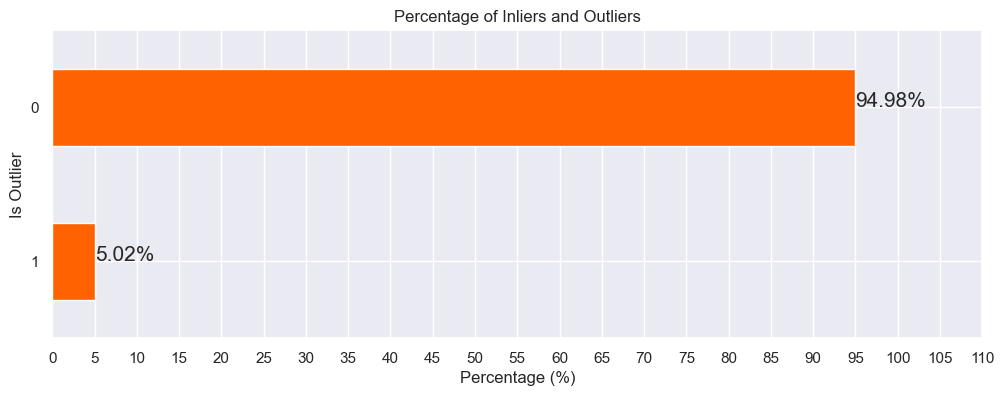

In [507]:
outlier_percentage = customer_data['Is_Outlier'].value_counts(normalize=True) * 100

# Plotting the percentage of inliers and outliers
plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='#ff6200')

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

In [508]:
outliers_data = customer_data[customer_data['Is_Outlier'] == 1]

In [509]:
outliers_data

,CustomerID,InvoiceDay,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,invoice_date,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Outlier_Scores,Is_Outlier
9,12356.0,2011-11-17,22,3,1573,2487.43,829.143333,52,5.315789,1,9,0,0,0.0,829.143333,991.462585,-944.635,-1,1
10,12357.0,2011-11-06,33,1,2708,6207.67,6207.67,131,0.0,6,16,0,0,0.0,6207.67,0.0,0.0,-1,1
12,12359.0,2011-12-02,7,6,1599,6182.98,1030.496667,214,1.296,3,12,0,2,0.333333,1030.496667,1137.566659,25.072571,-1,1
26,12377.0,2011-01-28,315,2,942,1548.12,774.06,71,0.52,0,9,0,0,0.0,774.06,321.677017,-454.92,-1,1
27,12378.0,2011-08-02,129,1,2529,4008.62,4008.62,219,0.0,1,10,0,0,0.0,4008.62,0.0,0.0,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4154,18109.0,2011-12-08,1,31,4212,7877.27,254.105484,120,0.817778,6,12,1,5,5.0,605.943846,292.86308,57.616538,-1,1
4160,18118.0,2011-11-29,10,31,2848,5564.63,179.504194,423,0.28357,4,12,1,5,5.0,505.875455,247.406608,-1.253455,-1,1
4174,18139.0,2011-11-22,17,6,5557,8438.34,1406.39,35,0.006329,0,14,1,0,0.0,8438.34,0.0,0.0,-1,1
4235,18223.0,2011-12-08,1,26,2891,6318.07,243.002692,118,1.20202,0,9,1,12,0.387097,574.37,464.999472,14.670545,-1,1


In [510]:
customer_data_cleaned = customer_data[customer_data['Is_Outlier'] == 0]

In [511]:
customer_data_cleaned 

,CustomerID,InvoiceDay,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,invoice_date,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Outlier_Scores,Is_Outlier
0,12346.0,2011-01-18,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0,1,0
1,12347.0,2011-12-07,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071,1,0
2,12348.0,2011-09-25,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,359.31,203.875689,-100.884,1,0
3,12349.0,2011-11-21,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0,0.0,1,0
4,12350.0,2011-02-02,310,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,18280.0,2011-03-07,277,1,45,180.6,180.6,10,0.0,0,9,1,0,0.0,180.6,0.0,0.0,1,0
4278,18281.0,2011-06-12,180,1,54,80.82,80.82,7,0.0,6,10,1,0,0.0,80.82,0.0,0.0,1,0
4279,18282.0,2011-12-02,7,3,98,176.6,58.866667,12,9.916667,4,13,1,1,0.142857,88.3,14.792674,-20.92,1,0
4280,18283.0,2011-12-06,3,16,1355,2039.58,127.47375,262,0.465181,3,14,1,0,0.0,203.958,165.798738,22.319273,1,0


In [512]:
customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])

In [513]:
customer_data_cleaned

,CustomerID,InvoiceDay,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,invoice_date,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,2011-01-18,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0
1,12347.0,2011-12-07,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071
2,12348.0,2011-09-25,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,359.31,203.875689,-100.884
3,12349.0,2011-11-21,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0,0.0
4,12350.0,2011-02-02,310,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,18280.0,2011-03-07,277,1,45,180.6,180.6,10,0.0,0,9,1,0,0.0,180.6,0.0,0.0
4278,18281.0,2011-06-12,180,1,54,80.82,80.82,7,0.0,6,10,1,0,0.0,80.82,0.0,0.0
4279,18282.0,2011-12-02,7,3,98,176.6,58.866667,12,9.916667,4,13,1,1,0.142857,88.3,14.792674,-20.92
4280,18283.0,2011-12-06,3,16,1355,2039.58,127.47375,262,0.465181,3,14,1,0,0.0,203.958,165.798738,22.319273


In [514]:
customer_data_cleaned.reset_index(drop=True,inplace=True)

In [515]:
customer_data_cleaned

,CustomerID,InvoiceDay,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,invoice_date,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,2011-01-18,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0
1,12347.0,2011-12-07,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071
2,12348.0,2011-09-25,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,359.31,203.875689,-100.884
3,12349.0,2011-11-21,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0,0.0
4,12350.0,2011-02-02,310,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4062,18280.0,2011-03-07,277,1,45,180.6,180.6,10,0.0,0,9,1,0,0.0,180.6,0.0,0.0
4063,18281.0,2011-06-12,180,1,54,80.82,80.82,7,0.0,6,10,1,0,0.0,80.82,0.0,0.0
4064,18282.0,2011-12-02,7,3,98,176.6,58.866667,12,9.916667,4,13,1,1,0.142857,88.3,14.792674,-20.92
4065,18283.0,2011-12-06,3,16,1355,2039.58,127.47375,262,0.465181,3,14,1,0,0.0,203.958,165.798738,22.319273


In [516]:
customer_data_cleaned.shape[0]

4067

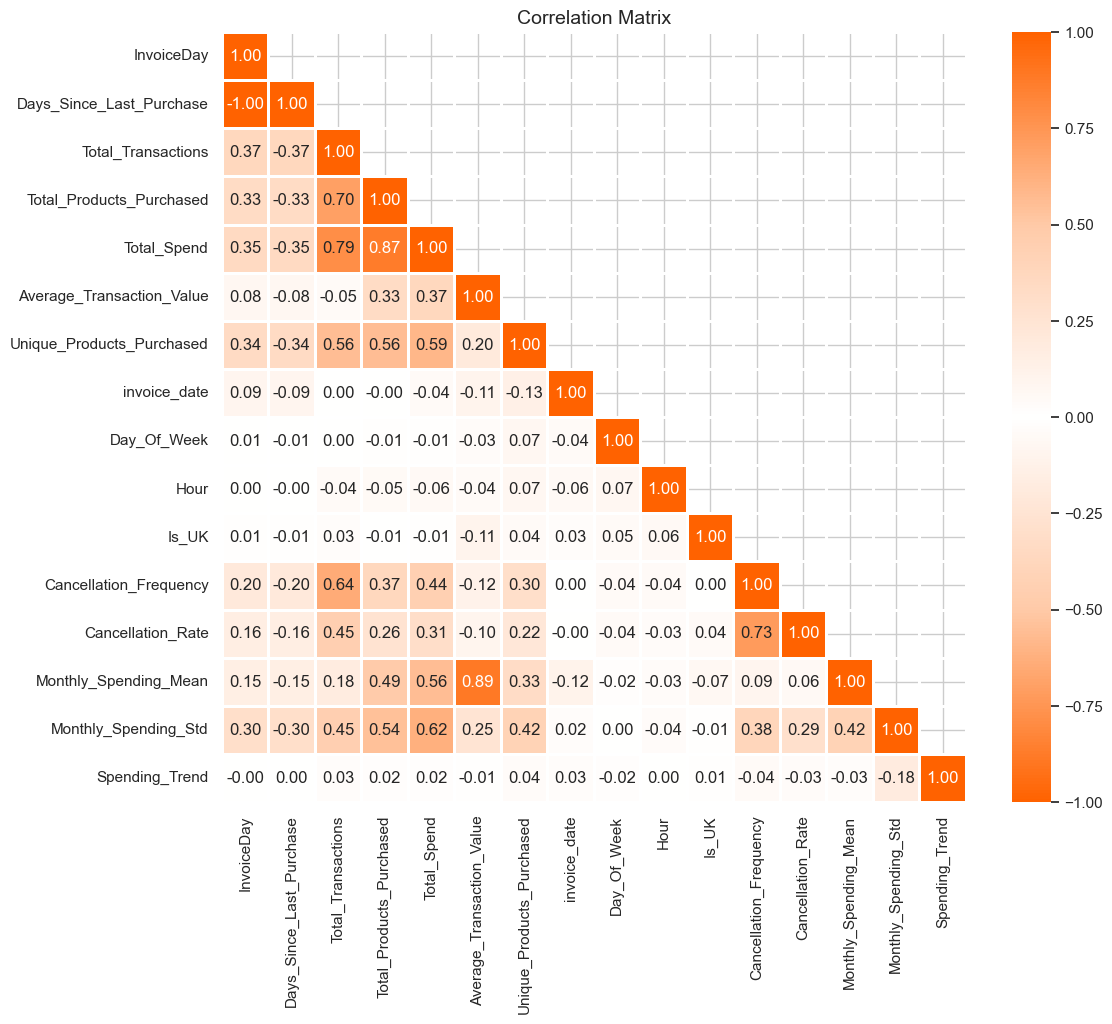

In [517]:


# Reset background style
sns.set_style('whitegrid')

# Calculate the correlation matrix excluding the 'CustomerID' column
corr = customer_data_cleaned.drop(columns=['CustomerID']).corr()

# Define a custom colormap
colors = ['#ff6200', '#ffcaa8', 'white', '#ffcaa8', '#ff6200']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

In [518]:
scaler = StandardScaler()

In [519]:
columns_to_exclude = ['CustomerID', 'Is_UK',"InvoiceDay", 'Day_Of_Week']

In [520]:
columns_to_scale = customer_data_cleaned.columns.difference(columns_to_exclude)

In [521]:
columns_to_scale

Index(['Average_Transaction_Value', 'Cancellation_Frequency',
       'Cancellation_Rate', 'Days_Since_Last_Purchase', 'Hour',
       'Monthly_Spending_Mean', 'Monthly_Spending_Std', 'Spending_Trend',
       'Total_Products_Purchased', 'Total_Spend', 'Total_Transactions',
       'Unique_Products_Purchased', 'invoice_date'],
      dtype='object')

In [522]:
customer_data_scaled = customer_data_cleaned.copy()

In [523]:
customer_data_cleaned

,CustomerID,InvoiceDay,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,invoice_date,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,2011-01-18,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0
1,12347.0,2011-12-07,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071
2,12348.0,2011-09-25,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,359.31,203.875689,-100.884
3,12349.0,2011-11-21,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0,0.0
4,12350.0,2011-02-02,310,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4062,18280.0,2011-03-07,277,1,45,180.6,180.6,10,0.0,0,9,1,0,0.0,180.6,0.0,0.0
4063,18281.0,2011-06-12,180,1,54,80.82,80.82,7,0.0,6,10,1,0,0.0,80.82,0.0,0.0
4064,18282.0,2011-12-02,7,3,98,176.6,58.866667,12,9.916667,4,13,1,1,0.142857,88.3,14.792674,-20.92
4065,18283.0,2011-12-06,3,16,1355,2039.58,127.47375,262,0.465181,3,14,1,0,0.0,203.958,165.798738,22.319273


In [524]:
customer_data_scaled 

,CustomerID,InvoiceDay,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,invoice_date,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,2011-01-18,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0
1,12347.0,2011-12-07,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071
2,12348.0,2011-09-25,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,359.31,203.875689,-100.884
3,12349.0,2011-11-21,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0,0.0
4,12350.0,2011-02-02,310,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4062,18280.0,2011-03-07,277,1,45,180.6,180.6,10,0.0,0,9,1,0,0.0,180.6,0.0,0.0
4063,18281.0,2011-06-12,180,1,54,80.82,80.82,7,0.0,6,10,1,0,0.0,80.82,0.0,0.0
4064,18282.0,2011-12-02,7,3,98,176.6,58.866667,12,9.916667,4,13,1,1,0.142857,88.3,14.792674,-20.92
4065,18283.0,2011-12-06,3,16,1355,2039.58,127.47375,262,0.465181,3,14,1,0,0.0,203.958,165.798738,22.319273


In [525]:
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])


In [526]:
customer_data_scaled[columns_to_scale]

,Average_Transaction_Value,Cancellation_Frequency,Cancellation_Rate,Days_Since_Last_Purchase,Hour,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Total_Products_Purchased,Total_Spend,Total_Transactions,Unique_Products_Purchased,invoice_date
0,-1.317106,0.420541,0.417623,2.345802,-1.086929,-1.329018,-0.713318,0.090868,-0.754491,-0.813464,-0.477589,-0.908471,-0.310564
1,1.528132,-0.545753,-0.432111,-0.905575,0.647126,0.989511,1.259961,0.116774,2.005048,2.366920,0.707930,0.815119,-0.128438
2,0.343279,-0.545753,-0.432111,-0.170744,2.814696,0.023997,0.466213,-0.491708,1.863591,0.247087,-0.003381,-0.570512,0.672476
3,5.418285,-0.545753,-0.432111,-0.744516,-1.520443,4.159521,-0.713318,0.090868,-0.047205,0.262074,-0.714692,0.291283,-0.310564
4,0.043327,-0.545753,-0.432111,2.194809,1.514154,-0.220428,-0.713318,0.090868,-0.534446,-0.596223,-0.714692,-0.655002,-0.310564
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4062,-0.482547,-0.545753,-0.432111,1.862625,-1.520443,-0.648952,-0.713318,0.090868,-0.703970,-0.680197,-0.714692,-0.756389,-0.310564
4063,-0.943634,-0.545753,-0.432111,0.886205,-1.086929,-1.024683,-0.713318,0.090868,-0.693866,-0.753826,-0.714692,-0.807083,-0.310564
4064,-1.045081,0.420541,-0.189330,-0.855244,0.213612,-0.996516,-0.627734,-0.029939,-0.644468,-0.683149,-0.240485,-0.722594,0.585056
4065,-0.728045,-0.545753,-0.432111,-0.895509,0.647126,-0.560996,0.245918,0.219755,0.766736,0.691559,2.841863,3.501891,-0.268551


In [527]:
customer_data_scaled.head()

,CustomerID,InvoiceDay,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,invoice_date,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,2011-01-18,2.345802,-0.477589,-0.754491,-0.813464,-1.317106,-0.908471,-0.310564,1,-1.086929,1,0.420541,0.417623,-1.329018,-0.713318,0.090868
1,12347.0,2011-12-07,-0.905575,0.707930,2.005048,2.366920,1.528132,0.815119,-0.128438,1,0.647126,0,-0.545753,-0.432111,0.989511,1.259961,0.116774
2,12348.0,2011-09-25,-0.170744,-0.003381,1.863591,0.247087,0.343279,-0.570512,0.672476,3,2.814696,0,-0.545753,-0.432111,0.023997,0.466213,-0.491708
3,12349.0,2011-11-21,-0.744516,-0.714692,-0.047205,0.262074,5.418285,0.291283,-0.310564,0,-1.520443,0,-0.545753,-0.432111,4.159521,-0.713318,0.090868
4,12350.0,2011-02-02,2.194809,-0.714692,-0.534446,-0.596223,0.043327,-0.655002,-0.310564,2,1.514154,0,-0.545753,-0.432111,-0.220428,-0.713318,0.090868


In [528]:
customer_data_scaled.set_index('CustomerID', inplace=True)

In [529]:
customer_data_scaled=customer_data_scaled.drop("InvoiceDay",axis=1)

In [530]:
customer_data_scaled

,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,invoice_date,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
CustomerID,,,,,,,,,,,,,,,
12346.0,2.345802,-0.477589,-0.754491,-0.813464,-1.317106,-0.908471,-0.310564,1,-1.086929,1,0.420541,0.417623,-1.329018,-0.713318,0.090868
12347.0,-0.905575,0.707930,2.005048,2.366920,1.528132,0.815119,-0.128438,1,0.647126,0,-0.545753,-0.432111,0.989511,1.259961,0.116774
12348.0,-0.170744,-0.003381,1.863591,0.247087,0.343279,-0.570512,0.672476,3,2.814696,0,-0.545753,-0.432111,0.023997,0.466213,-0.491708
12349.0,-0.744516,-0.714692,-0.047205,0.262074,5.418285,0.291283,-0.310564,0,-1.520443,0,-0.545753,-0.432111,4.159521,-0.713318,0.090868
12350.0,2.194809,-0.714692,-0.534446,-0.596223,0.043327,-0.655002,-0.310564,2,1.514154,0,-0.545753,-0.432111,-0.220428,-0.713318,0.090868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,1.862625,-0.714692,-0.703970,-0.680197,-0.482547,-0.756389,-0.310564,0,-1.520443,1,-0.545753,-0.432111,-0.648952,-0.713318,0.090868
18281.0,0.886205,-0.714692,-0.693866,-0.753826,-0.943634,-0.807083,-0.310564,6,-1.086929,1,-0.545753,-0.432111,-1.024683,-0.713318,0.090868
18282.0,-0.855244,-0.240485,-0.644468,-0.683149,-1.045081,-0.722594,0.585056,4,0.213612,1,0.420541,-0.189330,-0.996516,-0.627734,-0.029939


In [531]:
pca = PCA().fit(customer_data_scaled)

In [532]:
pca

PCA()

In [533]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

In [534]:
explained_variance_ratio

array([0.2772345 , 0.20982346, 0.12294149, 0.06775341, 0.06620834,
       0.06115386, 0.05242047, 0.04356324, 0.0295015 , 0.02814603,
       0.01685063, 0.01028464, 0.00517941, 0.00454682, 0.00439218])

In [535]:
cumulative_explained_variance

array([0.2772345 , 0.48705797, 0.60999946, 0.67775287, 0.74396122,
       0.80511507, 0.85753554, 0.90109878, 0.93060028, 0.95874632,
       0.97559695, 0.98588159, 0.991061  , 0.99560782, 1.        ])

In [536]:
optimal_k = 6

In [537]:
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

In [538]:
plt.figure(figsize=(20, 10))


<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

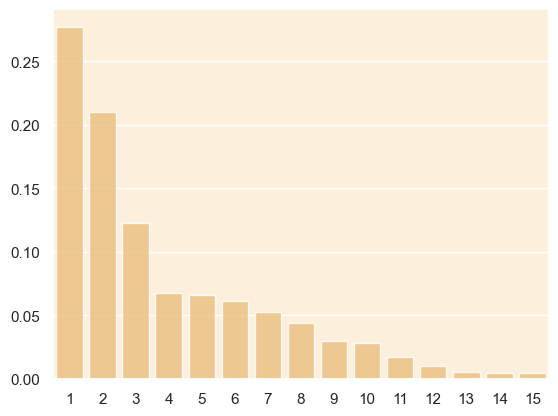

In [539]:
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)

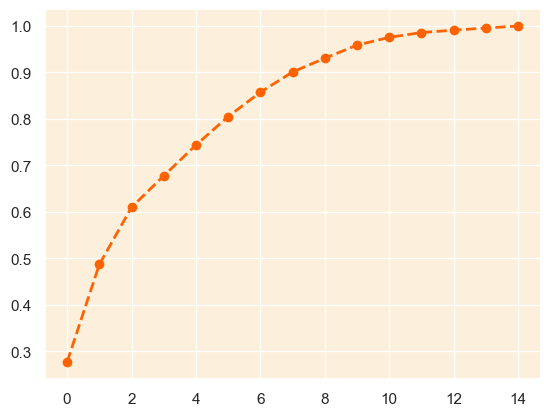

In [540]:
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)

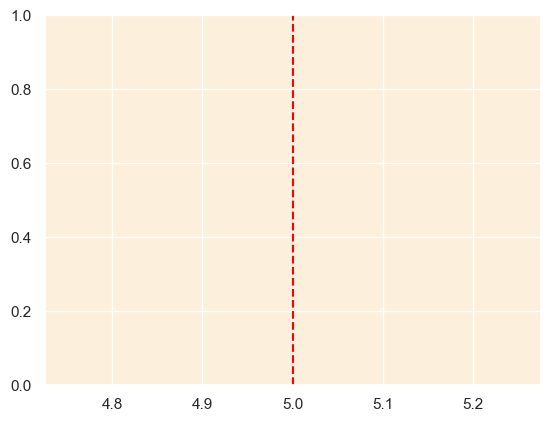

In [541]:
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}')

Text(0.5, 1.0, 'Cumulative Variance vs. Number of Components')

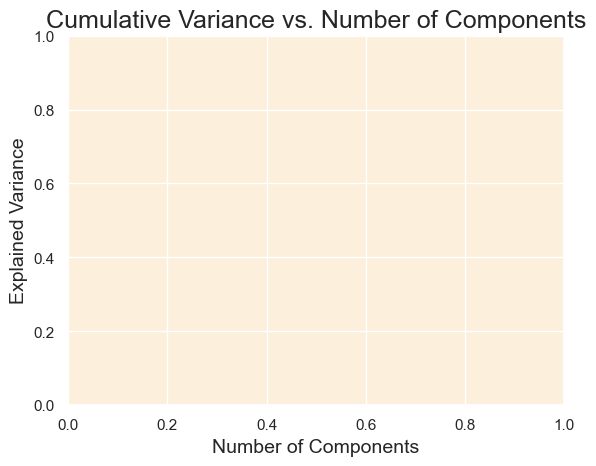

In [542]:
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)


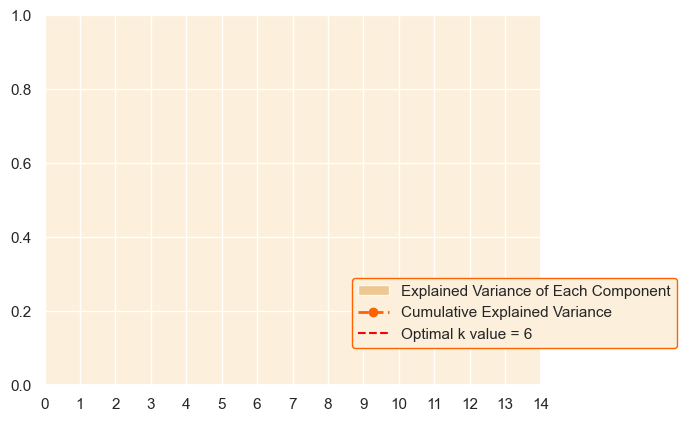

In [543]:
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,  
           edgecolor='#ff6200')  

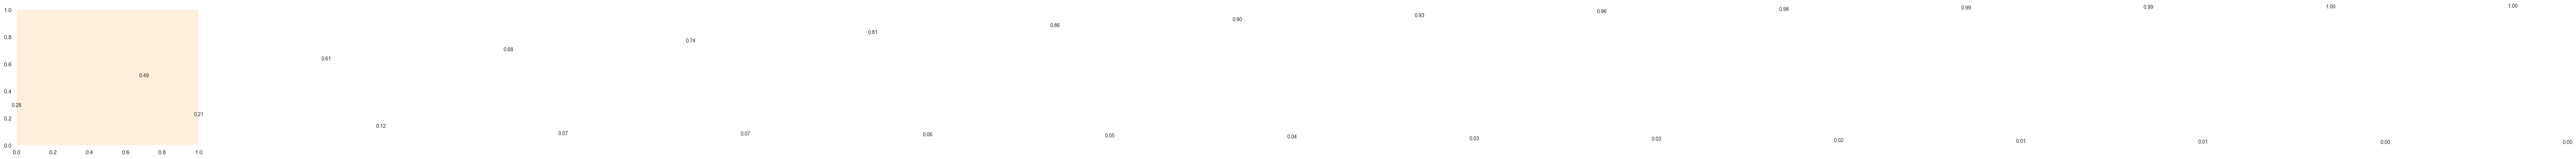

In [544]:
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

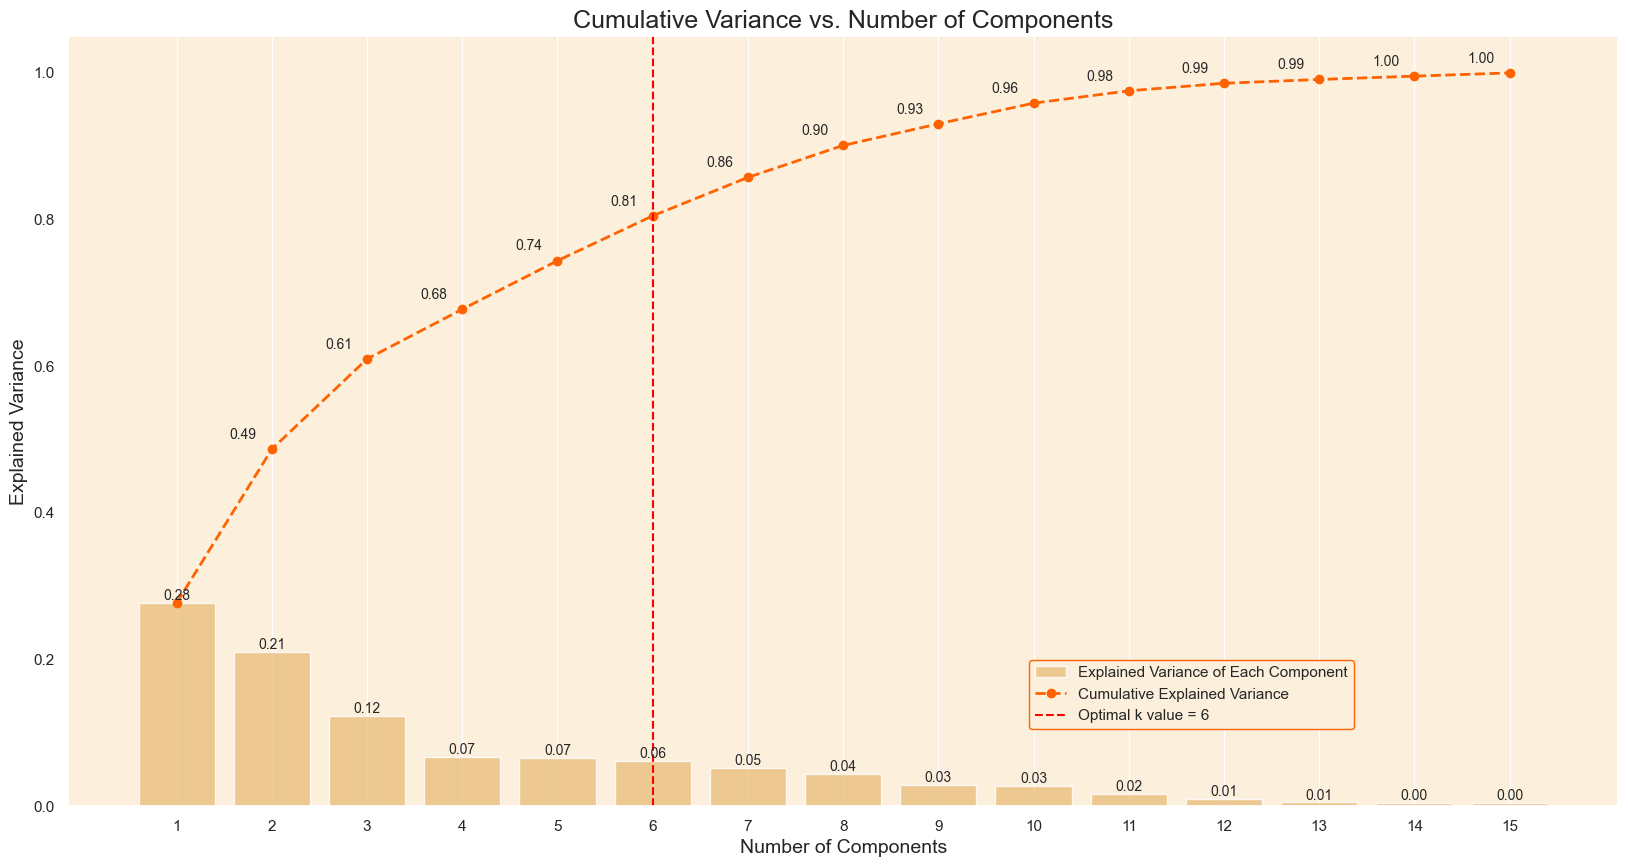

In [545]:
# Setting CustomerID as the index column


# Apply PCA
pca = PCA().fit(customer_data_scaled)

# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the optimal k value (based on our analysis, we can choose 6)
optimal_k = 6

# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)

# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}') 

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,  
           edgecolor='#ff6200')  

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

In [546]:
pca = PCA(n_components=6)


In [547]:
pca

PCA(n_components=6)

In [548]:
customer_data_pca = pca.fit_transform(customer_data_scaled)

In [549]:
customer_data_pca

array([[-2.18646932, -1.70536979, -1.57674451,  1.00818716, -0.4118034 ,
        -1.65801201],
       [ 3.29026411, -1.38737532,  1.92331017, -0.93099036, -0.01059128,
         0.87315006],
       [ 0.58468364,  0.5850194 ,  0.66472669, -0.65541078, -0.47028035,
         2.30665734],
       ...,
       [-1.33973818,  1.39268036, -1.41174049, -0.31529155,  0.59262814,
         0.51186447],
       [ 2.53919912,  0.81652505, -0.93828361, -2.2182651 , -0.86014276,
         1.22275103],
       [ 1.47872641, -0.61844955,  2.50267315, -1.09347891,  0.70573717,
        -1.54962417]])

In [550]:
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])


In [551]:
customer_data_pca

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.186469,-1.705370,-1.576745,1.008187,-0.411803,-1.658012
1,3.290264,-1.387375,1.923310,-0.930990,-0.010591,0.873150
2,0.584684,0.585019,0.664727,-0.655411,-0.470280,2.306657
3,1.791116,-2.695652,5.850040,0.853418,0.677111,-1.520098
4,-1.997139,-0.542639,0.578781,0.183682,-1.484838,0.062672
...,...,...,...,...,...,...
4062,-2.146381,-2.689132,0.015391,0.646035,0.076162,-1.474760
4063,-2.332032,3.322073,-0.554674,0.367612,0.432358,-1.124204
4064,-1.339738,1.392680,-1.411740,-0.315292,0.592628,0.511864
4065,2.539199,0.816525,-0.938284,-2.218265,-0.860143,1.222751


In [552]:
customer_data_pca.index = customer_data_scaled.index

In [553]:
customer_data_pca.index

Index(['12346.0', '12347.0', '12348.0', '12349.0', '12350.0', '12352.0',
       '12353.0', '12354.0', '12355.0', '12358.0',
       ...
       '18273.0', '18274.0', '18276.0', '18277.0', '18278.0', '18280.0',
       '18281.0', '18282.0', '18283.0', '18287.0'],
      dtype='string', name='CustomerID', length=4067)

In [554]:
customer_data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
CustomerID,,,,,,
12346.0,-2.186469,-1.705370,-1.576745,1.008187,-0.411803,-1.658012
12347.0,3.290264,-1.387375,1.923310,-0.930990,-0.010591,0.873150
12348.0,0.584684,0.585019,0.664727,-0.655411,-0.470280,2.306657
12349.0,1.791116,-2.695652,5.850040,0.853418,0.677111,-1.520098
12350.0,-1.997139,-0.542639,0.578781,0.183682,-1.484838,0.062672


In [555]:
# Creating a PCA object with 6 components
pca = PCA(n_components=6)

# Fitting and transforming the original data to the new PCA dataframe
customer_data_pca = pca.fit_transform(customer_data_scaled)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
customer_data_pca.index = customer_data_scaled.index

In [556]:
customer_data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
CustomerID,,,,,,
12346.0,-2.186469,-1.705370,-1.576745,1.008187,-0.411803,-1.658012
12347.0,3.290264,-1.387375,1.923310,-0.930990,-0.010591,0.873150
12348.0,0.584684,0.585019,0.664727,-0.655411,-0.470280,2.306657
12349.0,1.791116,-2.695652,5.850040,0.853418,0.677111,-1.520098
12350.0,-1.997139,-0.542639,0.578781,0.183682,-1.484838,0.062672


In [557]:
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #ffeacc' if i in top3 else '' for i in column.index]

# Create the PCA component DataFrame and apply the highlighting function
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],  
                     index=customer_data_scaled.columns)

pc_df.style.apply(highlight_top3, axis=0)

,PC1,PC2,PC3,PC4,PC5,PC6
Days_Since_Last_Purchase,-0.217859,-0.013986,0.067660,0.273430,-0.240968,-0.373059
Total_Transactions,0.380301,0.014759,-0.259180,-0.138165,-0.017356,-0.028257
Total_Products_Purchased,0.401425,0.007365,0.069133,-0.134806,0.057476,-0.013373
Total_Spend,0.431260,0.010159,0.065165,-0.092047,0.025202,-0.036947
Average_Transaction_Value,0.176225,-0.015544,0.589050,0.114307,0.021847,-0.101738
Unique_Products_Purchased,0.324992,0.063346,0.014010,-0.230502,-0.193981,0.124604
invoice_date,-0.022600,-0.036007,-0.127341,-0.160627,0.753462,0.211787
Day_Of_Week,-0.026572,0.994650,-0.006591,0.028870,0.058359,-0.060799
Hour,-0.024259,0.056388,-0.002019,-0.226832,-0.528881,0.621915
Is_UK,-0.001014,0.007435,-0.018378,-0.013419,-0.005353,0.014384


In [558]:
a.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,invoice_date,total_money_spent,Total_Spend,Day_Of_Week,Hour,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01,15.30,15.30,2,8,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,8,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01,22.00,22.00,2,8,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,8,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,20.34,2,8,2010,12
